## Parte 1: Setup Rápido - Dataset Ames Housing


### Paso 1.1: Setup Rápido - Cargar y Preprocesar


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('default')
sns.set_palette("husl")

print("=" * 80)
print("ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset")
print("=" * 80)

# ========== FUNCIÓN DE CARGA Y PREPROCESAMIENTO RÁPIDO ==========
def quick_load_and_preprocess_ames(filepath='train.csv'):
    """
    Carga y preprocesa Ames Housing en un solo paso
    (Ya hiciste esto en tareas anteriores, aquí es versión simplificada)
    """
    print("\n🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...")

    # Cargar dataset
    df = pd.read_csv(filepath)
    print(f"✅ Dataset cargado: {df.shape[0]:,} casas, {df.shape[1]} columnas")

    # Eliminar 'Id' (no predictivo)
    df = df.drop('Id', axis=1, errors='ignore')

    # Identificar tipos de variables
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Remover target de features
    if 'SalePrice' in numerical_cols:
        numerical_cols.remove('SalePrice')

    print(f"✅ Features numéricas: {len(numerical_cols)}")
    print(f"✅ Features categóricas: {len(categorical_cols)}")

    # Imputar valores faltantes
    num_imputer = SimpleImputer(strategy='median')
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print(f"✅ Missing values imputados")

    # Label encoding para categóricas
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    print(f"✅ Categóricas encoded")

    # Separar X y y
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    print(f"\n✅ DATASET LISTO:")
    print(f"   X shape: {X.shape} ({X.shape[1]} features)")
    print(f"   y shape: {y.shape}")
    print(f"   Precio promedio: ${y.mean():,.0f}")
    print(f"   Precio mediana: ${y.median():,.0f}")

    return X, y, X.columns.tolist()

# ========== EJECUTAR CARGA RÁPIDA ==========
# TODO: Completa con el path correcto
X, y, feature_names = quick_load_and_preprocess_ames('../csvs/AmesHousing.csv')

print(f"\n📊 RESUMEN DEL DATASET:")
print(f"   Total features: {X.shape[1]}")
print(f"   Total casas: {X.shape[0]:,}")
print(f"   Ejemplos de features: {feature_names[:10]}")

ASSIGNMENT UT3-10: PCA y Feature Selection - Ames Housing Dataset

🏠 CARGANDO Y PREPROCESANDO AMES HOUSING...
✅ Dataset cargado: 2,930 casas, 82 columnas
✅ Features numéricas: 38
✅ Features categóricas: 43
✅ Missing values imputados
✅ Categóricas encoded

✅ DATASET LISTO:
   X shape: (2930, 81) (81 features)
   y shape: (2930,)
   Precio promedio: $180,796
   Precio mediana: $160,000

📊 RESUMEN DEL DATASET:
   Total features: 81
   Total casas: 2,930
   Ejemplos de features: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour']


## Parte 2: PCA - Análisis de Componentes Principales


### Paso 2.1: Estandarización (Crítico para PCA)


In [4]:
from sklearn.preprocessing import StandardScaler

# ========== ESTANDARIZACIÓN ==========
print("=== ESTANDARIZACIÓN DE FEATURES ===")
print("⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.")

# TODO: Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar estandarización: mean ≈ 0, std ≈ 1
print(f"\n✅ Mean después de scaling: {X_scaled.mean():.6f} (esperado: ~0)")
print(f"✅ Std después de scaling: {X_scaled.std():.6f} (esperado: ~1)")

# Verificar shape
print(f"✅ X_scaled shape: {X_scaled.shape}")

# Comparar antes vs después
print(f"\n=== COMPARACIÓN ANTES vs DESPUÉS ===")
print(f"Antes - Mean GrLivArea: {X['Gr Liv Area'].mean():.0f}, Std: {X['Gr Liv Area'].std():.0f}")
print(f"Después - Mean GrLivArea: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].mean():.6f}, Std: {X_scaled[:, X.columns.get_loc('Gr Liv Area')].std():.6f}")

=== ESTANDARIZACIÓN DE FEATURES ===
⚠️ PCA es sensible a escala. SIEMPRE estandarizar antes de PCA.

✅ Mean después de scaling: -0.000000 (esperado: ~0)
✅ Std después de scaling: 1.000000 (esperado: ~1)
✅ X_scaled shape: (2930, 81)

=== COMPARACIÓN ANTES vs DESPUÉS ===
Antes - Mean GrLivArea: 1500, Std: 506
Después - Mean GrLivArea: 0.000000, Std: 1.000000


### Paso 2.2: Aplicar PCA Completo (80 Componentes)


In [5]:
from sklearn.decomposition import PCA
import time

# ========== APLICAR PCA SIN RESTRICCIONES ==========
print("\n=== APLICANDO PCA ===")
print("⏱️ Esto puede tomar 10-20 segundos con 80 features...")

start_time = time.time()

# TODO: Aplicar PCA sin restricción de componentes
pca = PCA()  # Sin n_components = todos los componentes posibles
X_pca = pca.fit_transform(X_scaled)

elapsed_time = time.time() - start_time
print(f"✅ PCA completado en {elapsed_time:.2f} segundos")

# ========== ANALIZAR VARIANZA EXPLICADA ==========
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")
print(f"Total de componentes generados: {X_pca.shape[1]}")
print(f"\nVarianza explicada por componentes principales:")
print(f"  PC1: {explained_variance[0]:.3%} (¡la más importante!)")
print(f"  PC2: {explained_variance[1]:.3%}")
print(f"  PC3: {explained_variance[2]:.3%}")
print(f"  PC4: {explained_variance[3]:.3%}")
print(f"  PC5: {explained_variance[4]:.3%}")

# TODO: Top 10 componentes
print("\n=== TOP 10 COMPONENTES ===")
for i in range(min(10, len(explained_variance))):
    print(f"PC{i+1:2d}: Individual {explained_variance[i]:6.3%} | Acumulada {cumulative_variance[i]:6.3%}")


=== APLICANDO PCA ===
⏱️ Esto puede tomar 10-20 segundos con 80 features...
✅ PCA completado en 0.02 segundos

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===
Total de componentes generados: 81

Varianza explicada por componentes principales:
  PC1: 13.409% (¡la más importante!)
  PC2: 4.956%
  PC3: 4.709%
  PC4: 3.690%
  PC5: 2.974%

=== TOP 10 COMPONENTES ===
PC 1: Individual 13.409% | Acumulada 13.409%
PC 2: Individual 4.956% | Acumulada 18.365%
PC 3: Individual 4.709% | Acumulada 23.074%
PC 4: Individual 3.690% | Acumulada 26.765%
PC 5: Individual 2.974% | Acumulada 29.739%
PC 6: Individual 2.727% | Acumulada 32.466%
PC 7: Individual 2.550% | Acumulada 35.017%
PC 8: Individual 2.404% | Acumulada 37.420%
PC 9: Individual 2.239% | Acumulada 39.659%
PC10: Individual 2.121% | Acumulada 41.780%


### Paso 2.3: Scree Plot y Decisión de Dimensionalidad



=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===


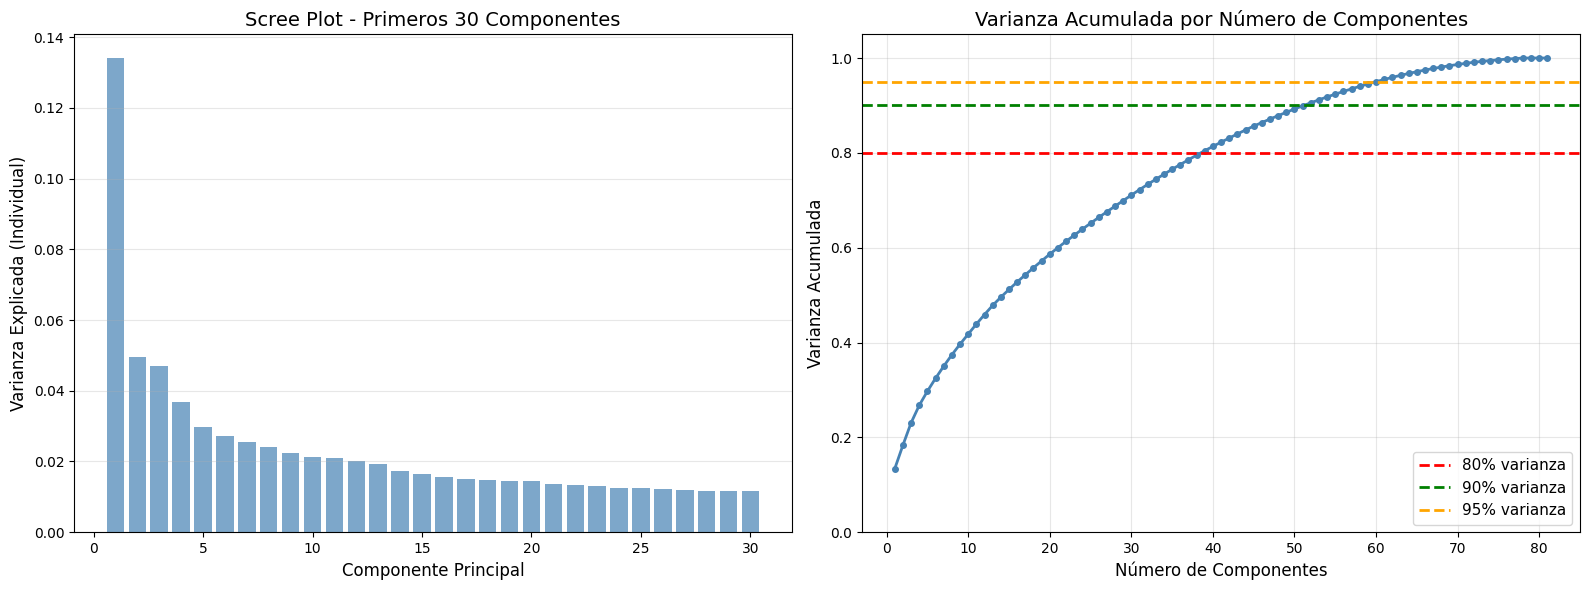


=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===
📊 Para 80% de varianza: 39 componentes
📊 Para 90% de varianza: 52 componentes
📊 Para 95% de varianza: 60 componentes

🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:
   Original: 81 features
   80% varianza: 81 → 39 (51.9% reducción)
   90% varianza: 81 → 52 (35.8% reducción)
   95% varianza: 81 → 60 (25.9% reducción)

💡 RECOMENDACIÓN PRÁCTICA:
   Para este assignment, usaremos 39 componentes (80% varianza)
   Esto balancea reducción dimensional con retención de información


In [6]:
# ========== CREAR SCREE PLOT ==========
print("\n=== SCREE PLOT: VISUALIZACIÓN DE VARIANZA ===")

# TODO: Crear scree plot con 80 componentes
plt.figure(figsize=(16, 6))

# Subplot 1: Varianza individual (primeros 30 componentes para claridad)
plt.subplot(1, 2, 1)
n_to_show = min(30, len(explained_variance))
plt.bar(range(1, n_to_show + 1), explained_variance[:n_to_show], alpha=0.7, color='steelblue')
plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Varianza Explicada (Individual)', fontsize=12)
plt.title(f'Scree Plot - Primeros {n_to_show} Componentes', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Varianza acumulada (TODOS los componentes)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', 
         color='steelblue', markersize=4, linewidth=2)

# Líneas de referencia
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza', linewidth=2)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza', linewidth=2)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', linewidth=2)

plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Acumulada', fontsize=12)
plt.title('Varianza Acumulada por Número de Componentes', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()

# ========== DECISIÓN DE DIMENSIONALIDAD ==========
print("\n=== DECISIÓN: ¿CUÁNTOS COMPONENTES NECESITAMOS? ===")

# TODO: Calcular componentes necesarios para diferentes umbrales
n_components_80 = next(i + 1 for i, v in enumerate(cumulative_variance) if v >= 0.80)
n_components_90 = next(i + 1 for i, v in enumerate(cumulative_variance) if v >= 0.90)
n_components_95 = next(i + 1 for i, v in enumerate(cumulative_variance) if v >= 0.95)

print(f"📊 Para 80% de varianza: {n_components_80} componentes")
print(f"📊 Para 90% de varianza: {n_components_90} componentes")
print(f"📊 Para 95% de varianza: {n_components_95} componentes")

# Análisis de reducción dimensional
original_features = X.shape[1]
reduction_80 = (1 - n_components_80 / original_features) * 100
reduction_90 = (1 - n_components_90 / original_features) * 100
reduction_95 = (1 - n_components_95 / original_features) * 100

print(f"\n🎯 IMPACTO DE REDUCCIÓN DIMENSIONAL:")
print(f"   Original: {original_features} features")
print(f"   80% varianza: {original_features} → {n_components_80} ({reduction_80:.1f}% reducción)")
print(f"   90% varianza: {original_features} → {n_components_90} ({reduction_90:.1f}% reducción)")
print(f"   95% varianza: {original_features} → {n_components_95} ({reduction_95:.1f}% reducción)")

print(f"\n💡 RECOMENDACIÓN PRÁCTICA:")
print(f"   Para este assignment, usaremos {n_components_80} componentes (80% varianza)")
print(f"   Esto balancea reducción dimensional con retención de información")

### Paso 2.4: Interpretación de Loadings (¿Qué representa cada PC?)



=== INTERPRETACIÓN DE COMPONENTES PRINCIPALES ===
Los loadings te dicen qué features originales contribuyen a cada componente

=== PC1: COMPONENTE PRINCIPAL #1 ===
Explica 13.4% de la varianza total

Top 10 features más importantes para PC1:
   1. Overall Qual        :  +0.827 (↑ positivo)
   2. Year Built          :  +0.790 (↑ positivo)
   3. Garage Cars         :  +0.737 (↑ positivo)
   4. Garage Yr Blt       :  +0.726 (↑ positivo)
   5. Garage Area         :  +0.709 (↑ positivo)
   6. Bsmt Qual           :  -0.708 (↓ negativo)
   7. Garage Finish       :  -0.683 (↓ negativo)
   8. Exter Qual          :  -0.682 (↓ negativo)
   9. Year Remod/Add      :  +0.671 (↑ positivo)
  10. Gr Liv Area         :  +0.659 (↑ positivo)

=== PC2: COMPONENTE PRINCIPAL #2 ===
Explica 5.0% de la varianza total

Top 10 features más importantes para PC2:
   1. 2nd Flr SF          :  +0.735 (↑ positivo)
   2. TotRms AbvGrd       :  +0.604 (↑ positivo)
   3. Bedroom AbvGr       :  +0.590 (↑ positivo)
   4.

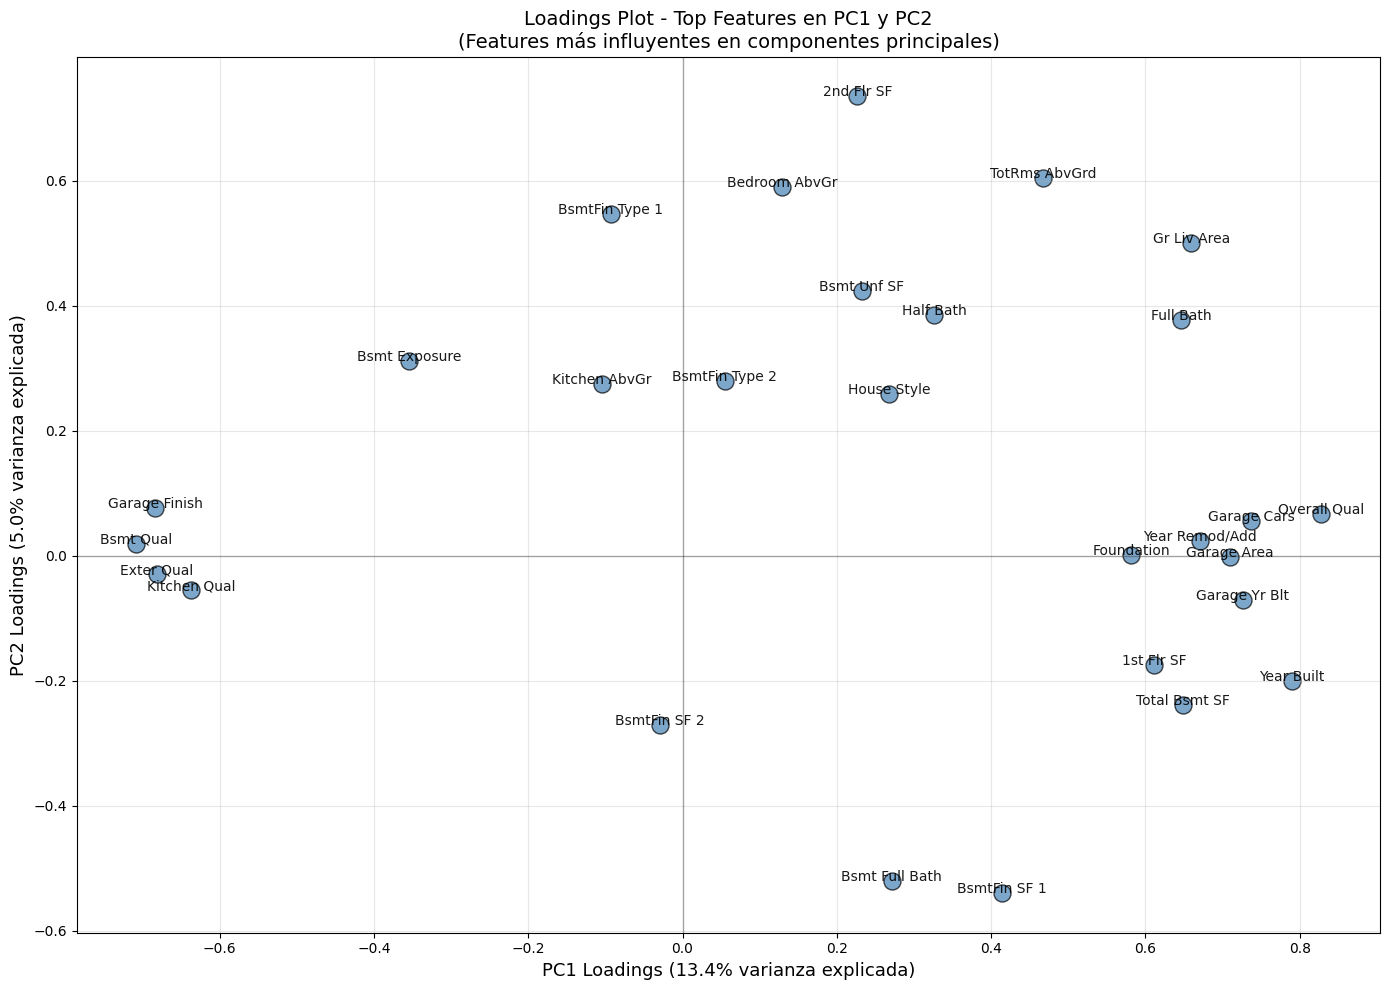


=== 💼 INTERPRETACIÓN DE NEGOCIO ===

PC1 representa principalmente (top 3):
  1. Overall Qual: Contribuye positivamente
  2. Year Built: Contribuye positivamente
  3. Garage Cars: Contribuye positivamente

💡 Interpretación: PC1 probablemente captura el 'tamaño/calidad general' de la casa

PC2 representa principalmente (top 3):
  1. 2nd Flr SF: Contribuye positivamente
  2. TotRms AbvGrd: Contribuye positivamente
  3. Bedroom AbvGr: Contribuye positivamente

💡 Interpretación: PC2 probablemente captura otra dimensión (edad, ubicación, etc.)


In [7]:
# ========== OBTENER LOADINGS ==========
print("\n=== INTERPRETACIÓN DE COMPONENTES PRINCIPALES ===")
print("Los loadings te dicen qué features originales contribuyen a cada componente")

# TODO: Obtener loadings de PC1 y PC2
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear DataFrame de loadings para PC1 y PC2
loadings_df = pd.DataFrame(
    loadings[:, :2],
    columns=['PC1', 'PC2'],
    index=X.columns
)

# ========== FEATURES MÁS IMPORTANTES PARA PC1 ==========
print("\n=== PC1: COMPONENTE PRINCIPAL #1 ===")
print(f"Explica {explained_variance[0]:.1%} de la varianza total")
print(f"\nTop 10 features más importantes para PC1:")
pc1_top = loadings_df['PC1'].abs().nlargest(10)
for i, (feature, loading_abs) in enumerate(pc1_top.items(), 1):
    loading_val = loadings_df.loc[feature, 'PC1']
    direction = "↑ positivo" if loading_val > 0 else "↓ negativo"
    print(f"  {i:2d}. {feature:20s}: {loading_val:+7.3f} ({direction})")

# ========== FEATURES MÁS IMPORTANTES PARA PC2 ==========
print("\n=== PC2: COMPONENTE PRINCIPAL #2 ===")
print(f"Explica {explained_variance[1]:.1%} de la varianza total")
print(f"\nTop 10 features más importantes para PC2:")
pc2_top = loadings_df['PC2'].abs().nlargest(10)
for i, (feature, loading_abs) in enumerate(pc2_top.items(), 1):
    loading_val = loadings_df.loc[feature, 'PC2']
    direction = "↑ positivo" if loading_val > 0 else "↓ negativo"
    print(f"  {i:2d}. {feature:20s}: {loading_val:+7.3f} ({direction})")

# ========== VISUALIZAR LOADINGS (solo top features para claridad) ==========
print("\n=== VISUALIZACIÓN DE LOADINGS ===")

# Seleccionar top features para visualizar (top 15 de PC1 o PC2)
top_features_pc1 = set(loadings_df['PC1'].abs().nlargest(15).index)
top_features_pc2 = set(loadings_df['PC2'].abs().nlargest(15).index)
top_features = list(top_features_pc1.union(top_features_pc2))

loadings_df_viz = loadings_df.loc[top_features]

plt.figure(figsize=(14, 10))
plt.scatter(loadings_df_viz['PC1'], loadings_df_viz['PC2'], alpha=0.7, s=150, c='steelblue', edgecolors='black')

# Anotar features
for feature in loadings_df_viz.index:
    plt.annotate(feature, 
                (loadings_df_viz.loc[feature, 'PC1'], loadings_df_viz.loc[feature, 'PC2']), 
                fontsize=10, alpha=0.9, ha='center')

plt.xlabel(f'PC1 Loadings ({explained_variance[0]:.1%} varianza explicada)', fontsize=13)
plt.ylabel(f'PC2 Loadings ({explained_variance[1]:.1%} varianza explicada)', fontsize=13)
plt.title('Loadings Plot - Top Features en PC1 y PC2\n(Features más influyentes en componentes principales)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3, linewidth=1)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3, linewidth=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ========== INTERPRETACIÓN DE NEGOCIO ==========
print("\n=== 💼 INTERPRETACIÓN DE NEGOCIO ===")
print("\nPC1 representa principalmente (top 3):")
for i, (feature, loading_abs) in enumerate(loadings_df['PC1'].abs().nlargest(3).items(), 1):
    loading_val = loadings_df.loc[feature, 'PC1']
    direction = "positivamente" if loading_val > 0 else "negativamente"
    print(f"  {i}. {feature}: Contribuye {direction}")

print("\n💡 Interpretación: PC1 probablemente captura el 'tamaño/calidad general' de la casa")

print("\nPC2 representa principalmente (top 3):")
for i, (feature, loading_abs) in enumerate(loadings_df['PC2'].abs().nlargest(3).items(), 1):
    loading_val = loadings_df.loc[feature, 'PC2']
    direction = "positivamente" if loading_val > 0 else "negativamente"
    print(f"  {i}. {feature}: Contribuye {direction}")

print("\n💡 Interpretación: PC2 probablemente captura otra dimensión (edad, ubicación, etc.)")

### Paso 2.5: Feature Selection Basada en PCA Loadings (CRÍTICO)



=== FEATURE SELECTION BASADA EN PCA LOADINGS ===
💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES
   que tienen mayor loading (peso) en los componentes principales

🔍 Analizando loadings de los primeros 39 componentes...

📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos

🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:
   1. Roof Matl                : 4.7138
   2. Functional               : 4.4919
   3. Screen Porch             : 4.4469
   4. Mo Sold                  : 4.3587
   5. Heating                  : 4.2757
   6. Bsmt Half Bath           : 4.2228
   7. Fence                    : 4.2113
   8. Land Contour             : 4.1697
   9. Sale Condition           : 4.1697
  10. Condition 2              : 4.1586
  11. Low Qual Fin SF          : 4.1478
  12. Roof Style               : 4.1321
  13. Sale Type                : 4.0840
  14. Utilities                : 4.0320
  15. Lot Config               : 4.0027
  16. Open Porch SF            : 3.9693
  17. Enclosed

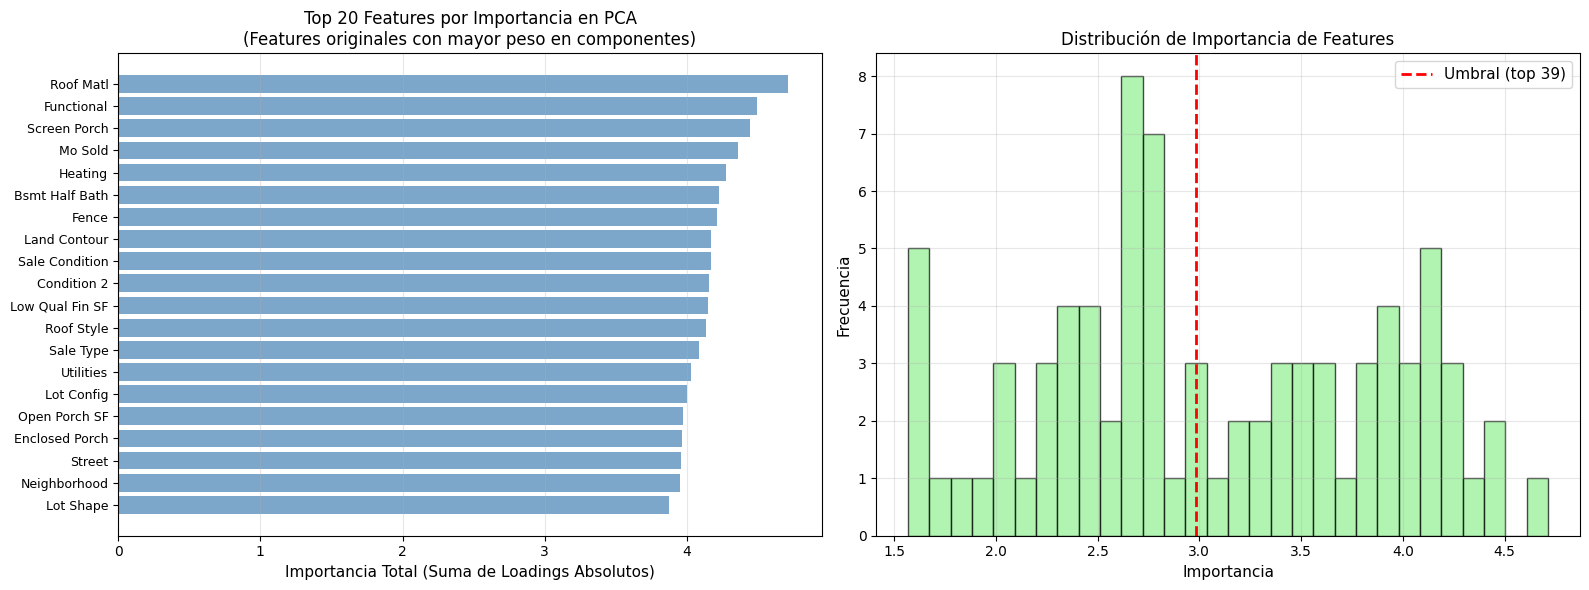


💡 INTERPRETACIÓN:
   Estas features originales son las que 'explican' los componentes principales
   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')
   Diferencia con PCA: Usas features originales, no combinaciones lineales


In [8]:
# ========== FEATURE SELECTION BASADA EN PCA LOADINGS ==========
print("\n=== FEATURE SELECTION BASADA EN PCA LOADINGS ===")
print("💡 En lugar de usar PC1, PC2... usaremos las features ORIGINALES")
print("   que tienen mayor loading (peso) en los componentes principales")

# Decidir cuántos componentes considerar
n_top_components = 39

# Obtener loadings absolutos de todos los componentes importantes
print(f"\n🔍 Analizando loadings de los primeros {n_top_components} componentes...")

# Para cada componente, obtener las features con mayor loading absoluto
all_loadings = pca.components_[:n_top_components, :]  # Primeros n componentes

# Crear DataFrame con loadings de todos los componentes
loadings_all = pd.DataFrame(
    all_loadings.T,
    columns=[f'PC{i+1}' for i in range(n_top_components)],
    index=X.columns
)

# ========== ESTRATEGIA: SUMAR LOADINGS ABSOLUTOS ==========
# Para cada feature, sumar su importancia (loading absoluto) en todos los componentes
print("\n📊 ESTRATEGIA: Ranking de features por suma de loadings absolutos")

# TODO: Calcular importancia total de cada feature
feature_importance_from_pca = loadings_all.abs().sum(axis=1)

# Ordenar por importancia
feature_importance_from_pca = feature_importance_from_pca.sort_values(ascending=False)

print(f"\n🔝 TOP 20 FEATURES POR IMPORTANCIA EN PCA:")
for i, (feature, importance) in enumerate(feature_importance_from_pca.head(20).items(), 1):
    print(f"  {i:2d}. {feature:25s}: {importance:.4f}")

# ========== SELECCIONAR TOP-K FEATURES ==========
k = n_components_80  # Mismo número que usamos con PCA reducido

print(f"\n✅ Seleccionando top {k} features originales basadas en loadings de PCA")

# TODO: Seleccionar features
selected_features_pca = feature_importance_from_pca.head(k).index.tolist()

print(f"\n📋 Features seleccionadas ({k}):")
for i, feat in enumerate(selected_features_pca, 1):
    print(f"  {i:2d}. {feat}")

# ========== PREPARAR DATASET CON FEATURES SELECCIONADAS ==========
X_pca_selected = X_scaled[:, X.columns.isin(selected_features_pca)]

print(f"\n✅ Dataset con features seleccionadas por PCA:")
print(f"   Shape: {X_pca_selected.shape}")
print(f"   Reducción: {X.shape[1]} → {X_pca_selected.shape[1]} features")

# ========== VISUALIZAR COMPARACIÓN ==========
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 20 features por importancia PCA
ax1.barh(range(20), feature_importance_from_pca.head(20).values, color='steelblue', alpha=0.7)
ax1.set_yticks(range(20))
ax1.set_yticklabels(feature_importance_from_pca.head(20).index, fontsize=9)
ax1.set_xlabel('Importancia Total (Suma de Loadings Absolutos)', fontsize=11)
ax1.set_title('Top 20 Features por Importancia en PCA\n(Features originales con mayor peso en componentes)', fontsize=12)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Distribución de importancias
ax2.hist(feature_importance_from_pca, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Importancia', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de Importancia de Features', fontsize=12)
ax2.axvline(feature_importance_from_pca.iloc[k-1], color='red', linestyle='--', 
            label=f'Umbral (top {k})', linewidth=2)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print("   Estas features originales son las que 'explican' los componentes principales")
print("   Ventaja: Mantienen interpretabilidad (puedes decir 'GrLivArea importa')")
print("   Diferencia con PCA: Usas features originales, no combinaciones lineales")

### Paso 2.6: Evaluación de Performance con REGRESIÓN (RMSE y R²)


In [9]:
from sklearn.ensemble import RandomForestRegressor  # ⚠️ REGRESSOR, no Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')  # Suprimir warnings de convergencia

# ========== MODELO BASELINE: TODAS LAS FEATURES ORIGINALES ==========
print("\n=== EVALUACIÓN DE PERFORMANCE: PCA vs ORIGINAL ===")
print("⏱️ Esto puede tomar 1-2 minutos (cross-validation con 80 features)...\n")

# TODO: Evaluar modelo con datos originales
print("🔄 Evaluando modelo con features originales...")
rf_original = RandomForestRegressor(
    random_state=42, 
    n_estimators=100,
    max_depth=15,
    n_jobs=-1             # Usar todos los cores
)

# Usar neg_mean_squared_error y neg_mean_absolute_error para CV
scores_mse_original = -cross_val_score(rf_original, X_scaled, y, cv=5, 
                                        scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_original = cross_val_score(rf_original, X_scaled, y, cv=5, 
                                     scoring='r2', n_jobs=-1)

rmse_original = np.sqrt(scores_mse_original)

print(f"\n✅ BASELINE - Features Originales ({X.shape[1]} features):")
print(f"   RMSE: ${rmse_original.mean():,.0f} ± ${rmse_original.std():,.0f}")
print(f"   R²:   {scores_r2_original.mean():.4f} ± {scores_r2_original.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_original]}")

# ========== MODELO CON PCA (80% VARIANZA) ==========
print(f"\n🔄 Evaluando modelo con PCA ({n_components_80} componentes)...")

# TODO: Aplicar PCA reducido
pca_reduced = PCA(n_components=n_components_80)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)

print(f"✅ PCA transformado: {X.shape[1]} → {X_pca_reduced.shape[1]} features")

# Evaluar con PCA
rf_pca = RandomForestRegressor(
    random_state=42, 
    n_estimators=100, 
    max_depth=15,
    n_jobs=-1
)

scores_mse_pca = -cross_val_score(rf_pca, X_pca_reduced, y, cv=5, 
                                   scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_pca = cross_val_score(rf_pca, X_pca_reduced, y, cv=5, 
                                scoring='r2', n_jobs=-1)

rmse_pca = np.sqrt(scores_mse_pca)

print(f"\n✅ PCA - Componentes Reducidos ({n_components_80} componentes):")
print(f"   RMSE: ${rmse_pca.mean():,.0f} ± ${rmse_pca.std():,.0f}")
print(f"   R²:   {scores_r2_pca.mean():.4f} ± {scores_r2_pca.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_pca]}")

# ========== MODELO CON FEATURES SELECCIONADAS POR PCA LOADINGS ==========
print(f"\n🔄 Evaluando modelo con features originales seleccionadas por PCA loadings...")

rf_pca_selected = RandomForestRegressor(
    random_state=42, 
    n_estimators=100, 
    max_depth=15,
    n_jobs=-1
)

scores_mse_pca_selected = -cross_val_score(rf_pca_selected, X_pca_selected, y, cv=5, 
                                             scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_pca_selected = cross_val_score(rf_pca_selected, X_pca_selected, y, cv=5, 
                                          scoring='r2', n_jobs=-1)

rmse_pca_selected = np.sqrt(scores_mse_pca_selected)

print(f"\n✅ PCA Loadings - Features Originales Seleccionadas ({len(selected_features_pca)} features):")
print(f"   RMSE: ${rmse_pca_selected.mean():,.0f} ± ${rmse_pca_selected.std():,.0f}")
print(f"   R²:   {scores_r2_pca_selected.mean():.4f} ± {scores_r2_pca_selected.std():.4f}")
print(f"   Scores RMSE: {[f'${x:,.0f}' for x in rmse_pca_selected]}")

# ========== ANÁLISIS COMPARATIVO ==========
print(f"\n" + "="*80)
print(f"{'COMPARACIÓN: ORIGINAL vs PCA vs PCA LOADINGS':^80}")
print(f"="*80)

reduction_pct = (1 - n_components_80 / X.shape[1]) * 100
rmse_diff_pca = rmse_pca.mean() - rmse_original.mean()
rmse_diff_pca_selected = rmse_pca_selected.mean() - rmse_original.mean()
r2_diff_pca = scores_r2_pca.mean() - scores_r2_original.mean()
r2_diff_pca_selected = scores_r2_pca_selected.mean() - scores_r2_original.mean()

print(f"\n📊 REDUCCIÓN DIMENSIONAL:")
print(f"   Original: {X.shape[1]} features")
print(f"   PCA: {X.shape[1]} → {n_components_80} componentes ({reduction_pct:.1f}% reducción)")
print(f"   PCA Loadings: {X.shape[1]} → {len(selected_features_pca)} features originales ({reduction_pct:.1f}% reducción)")
print(f"   Varianza retenida (PCA): {pca_reduced.explained_variance_ratio_.sum():.1%}")

print(f"\n📊 PERFORMANCE COMPARATIVO:")
print(f"\n   {'Método':<25s} {'RMSE':>15s} {'R²':>10s} {'Features':>10s}")
print(f"   {'-'*25} {'-'*15} {'-'*10} {'-'*10}")
print(f"   {'Original':<25s} ${rmse_original.mean():>14,.0f} {scores_r2_original.mean():>10.4f} {X.shape[1]:>10d}")
print(f"   {'PCA Componentes':<25s} ${rmse_pca.mean():>14,.0f} {scores_r2_pca.mean():>10.4f} {n_components_80:>10d}")
print(f"   {'PCA Loadings (Originales)':<25s} ${rmse_pca_selected.mean():>14,.0f} {scores_r2_pca_selected.mean():>10.4f} {len(selected_features_pca):>10d}")

print(f"\n📊 DIFERENCIAS VS ORIGINAL:")
print(f"   PCA Componentes:  RMSE {rmse_diff_pca:+,.0f} ({(rmse_diff_pca/rmse_original.mean())*100:+.1f}%) | R² {r2_diff_pca:+.4f}")
print(f"   PCA Loadings:     RMSE {rmse_diff_pca_selected:+,.0f} ({(rmse_diff_pca_selected/rmse_original.mean())*100:+.1f}%) | R² {r2_diff_pca_selected:+.4f}")

# Interpretación
print(f"\n💡 INTERPRETACIÓN:")
print(f"\n   🔵 PCA Componentes (PC1, PC2...):")
if rmse_pca.mean() < rmse_original.mean() * 1.05:
    print(f"      ✅ Mantiene performance similar con {reduction_pct:.0f}% reducción")
    print(f"      ⚠️ Pero: Componentes son combinaciones lineales (menos interpretables)")
else:
    print(f"      ⚠️ Pierde precisión significativa ({(rmse_diff_pca/rmse_original.mean())*100:.1f}%)")

print(f"\n   🟢 PCA Loadings (Features originales):")
if rmse_pca_selected.mean() < rmse_original.mean() * 1.05:
    print(f"      ✅ Mantiene performance similar con {reduction_pct:.0f}% reducción")
    print(f"      ✅ Plus: Usa features originales (interpretables)")
else:
    print(f"      ⚠️ Pierde precisión ({(rmse_diff_pca_selected/rmse_original.mean())*100:.1f}%)")

print(f"\n   💼 PARA NEGOCIO:")
print(f"      - PCA Componentes: Mejor para modelos 'black box' donde solo importa precisión")
print(f"      - PCA Loadings: Mejor para negocio (puedes decir 'GrLivArea es importante')")


=== EVALUACIÓN DE PERFORMANCE: PCA vs ORIGINAL ===
⏱️ Esto puede tomar 1-2 minutos (cross-validation con 80 features)...

🔄 Evaluando modelo con features originales...

✅ BASELINE - Features Originales (81 features):
   RMSE: $26,308 ± $4,339
   R²:   0.8888 ± 0.0309
   Scores RMSE: ['$27,395', '$20,511', '$27,418', '$33,190', '$23,025']

🔄 Evaluando modelo con PCA (39 componentes)...
✅ PCA transformado: 81 → 39 features

✅ PCA - Componentes Reducidos (39 componentes):
   RMSE: $26,715 ± $4,125
   R²:   0.8850 ± 0.0323
   Scores RMSE: ['$25,623', '$22,249', '$27,112', '$34,320', '$24,271']

🔄 Evaluando modelo con features originales seleccionadas por PCA loadings...

✅ PCA Loadings - Features Originales Seleccionadas (39 features):
   RMSE: $41,773 ± $3,804
   R²:   0.7229 ± 0.0340
   Scores RMSE: ['$43,784', '$37,411', '$38,927', '$48,092', '$40,650']

                  COMPARACIÓN: ORIGINAL vs PCA vs PCA LOADINGS                  

📊 REDUCCIÓN DIMENSIONAL:
   Original: 81 features
 

## Parte 3: Feature Selection - Filter Methods



=== FILTER METHOD: F-TEST (ANOVA) ===
F-test mide la relación lineal entre cada feature y el target (SalePrice)

Seleccionando top 39 features con F-test...

✅ Features seleccionadas por F-test (39):
   1. PID
   2. Lot Frontage
   3. Lot Area
   4. Lot Shape
   5. Neighborhood
   6. Overall Qual
   7. Year Built
   8. Year Remod/Add
   9. Roof Style
  10. Mas Vnr Type
  11. Mas Vnr Area
  12. Exter Qual
  13. Foundation
  14. Bsmt Qual
  15. Bsmt Exposure
  16. BsmtFin SF 1
  17. Bsmt Unf SF
  18. Total Bsmt SF
  19. Heating QC
  20. Central Air
  21. Electrical
  22. 1st Flr SF
  23. 2nd Flr SF
  24. Gr Liv Area
  25. Bsmt Full Bath
  26. Full Bath
  27. Half Bath
  28. Kitchen Qual
  29. TotRms AbvGrd
  30. Fireplaces
  31. Garage Type
  32. Garage Yr Blt
  33. Garage Finish
  34. Garage Cars
  35. Garage Area
  36. Paved Drive
  37. Wood Deck SF
  38. Open Porch SF
  39. Sale Condition

=== TOP 15 F-SCORES (Mayor correlación con SalePrice) ===
   1. Overall Qual        : 5,179
   

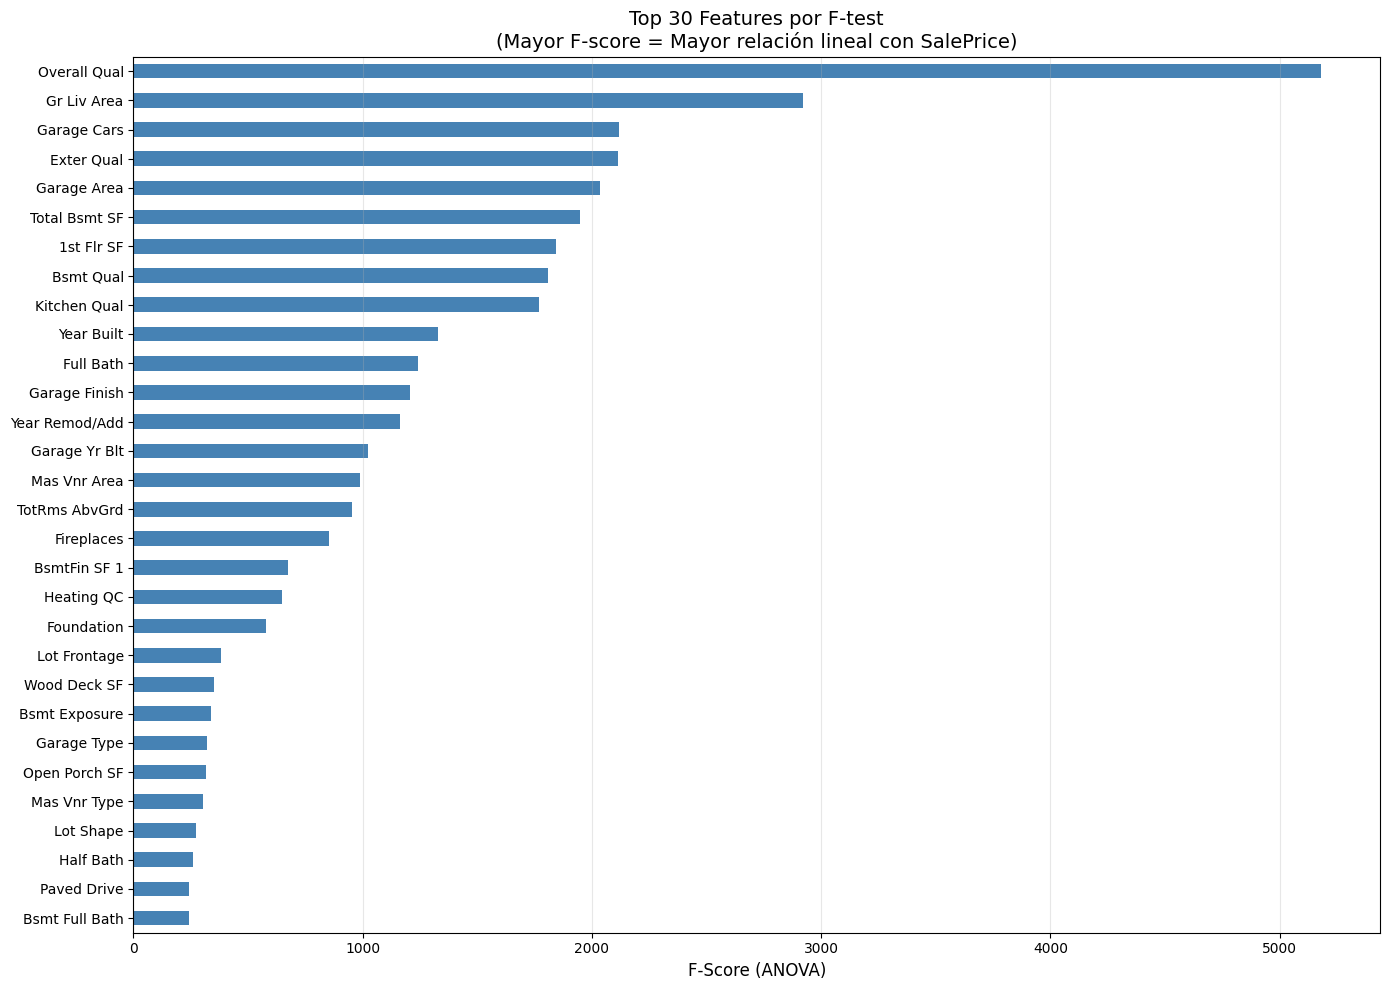

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression  # ⚠️ f_regression, no f_classif

# ========== F-TEST PARA REGRESIÓN ==========
print("\n=== FILTER METHOD: F-TEST (ANOVA) ===")
print("F-test mide la relación lineal entre cada feature y el target (SalePrice)")

# TODO: Seleccionar top-k features por F-test
k = n_components_80  # Mismo número que PCA para comparación justa

print(f"\nSeleccionando top {k} features con F-test...")

selector_f = SelectKBest(f_regression, k=k)
X_filter_f = selector_f.fit_transform(X_scaled, y)

# Identificar features seleccionadas
selected_features_f = X.columns[selector_f.get_support()]
print(f"\n✅ Features seleccionadas por F-test ({k}):")
for i, feat in enumerate(selected_features_f, 1):
    print(f"  {i:2d}. {feat}")

# ========== SCORES DE F-TEST ==========
scores_f = pd.Series(selector_f.scores_, index=X.columns).sort_values(ascending=False)
print(f"\n=== TOP 15 F-SCORES (Mayor correlación con SalePrice) ===")
for i, (feat, score) in enumerate(scores_f.head(15).items(), 1):
    print(f"  {i:2d}. {feat:20s}: {score:,.0f}")

# TODO: Visualizar scores (top 30 para claridad)
plt.figure(figsize=(14, 10))
scores_f.head(30).sort_values(ascending=True).plot(kind='barh', color='steelblue')
plt.xlabel('F-Score (ANOVA)', fontsize=12)
plt.title('Top 30 Features por F-test\n(Mayor F-score = Mayor relación lineal con SalePrice)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Paso 3.2: Filter Method - Mutual Information (Captura relaciones no-lineales)


In [11]:
from sklearn.feature_selection import mutual_info_regression  # ⚠️ mutual_info_regression, no classif

# ========== MUTUAL INFORMATION PARA REGRESIÓN ==========
print("\n=== FILTER METHOD: MUTUAL INFORMATION ===")
print("MI captura relaciones LINEALES Y NO-LINEALES (más flexible que F-test)")
print("⏱️ Esto puede tomar 30-60 segundos...")

# TODO: Seleccionar top-k features por Mutual Information
selector_mi = SelectKBest(mutual_info_regression, k=k)
X_filter_mi = selector_mi.fit_transform(X_scaled, y)

selected_features_mi = X.columns[selector_mi.get_support()]
print(f"\n✅ Features seleccionadas por Mutual Information ({k}):")
for i, feat in enumerate(selected_features_mi, 1):
    print(f"  {i:2d}. {feat}")

# Scores
scores_mi = pd.Series(selector_mi.scores_, index=X.columns).sort_values(ascending=False)
print(f"\n=== TOP 15 MI SCORES ===")
for i, (feat, score) in enumerate(scores_mi.head(15).items(), 1):
    print(f"  {i:2d}. {feat:20s}: {score:.4f}")

# ========== COMPARACIÓN: F-TEST vs MUTUAL INFORMATION ==========
common_features = set(selected_features_f) & set(selected_features_mi)
print(f"\n" + "="*70)
print(f"{'COMPARACIÓN: F-TEST vs MUTUAL INFORMATION':^70}")
print(f"="*70)
print(f"\n📊 Features en común: {len(common_features)} de {k} ({len(common_features)/k*100:.1f}% coincidencia)")

print(f"\n✅ Features comunes (ambos métodos las eligieron):")
for i, feat in enumerate(sorted(common_features), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n🔵 Features SOLO en F-test:")
only_f = set(selected_features_f) - set(selected_features_mi)
for i, feat in enumerate(sorted(only_f), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n🟢 Features SOLO en Mutual Information:")
only_mi = set(selected_features_mi) - set(selected_features_f)
for i, feat in enumerate(sorted(only_mi), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n💡 INTERPRETACIÓN:")
if len(common_features) / k > 0.7:
    print(f"   Alta coincidencia ({len(common_features)/k*100:.0f}%) → Ambos métodos están de acuerdo")
else:
    print(f"   Baja coincidencia ({len(common_features)/k*100:.0f}%) → MI captura relaciones no-lineales diferentes")


=== FILTER METHOD: MUTUAL INFORMATION ===
MI captura relaciones LINEALES Y NO-LINEALES (más flexible que F-test)
⏱️ Esto puede tomar 30-60 segundos...

✅ Features seleccionadas por Mutual Information (39):
   1. Order
   2. PID
   3. MS SubClass
   4. MS Zoning
   5. Lot Frontage
   6. Lot Area
   7. Neighborhood
   8. Overall Qual
   9. Overall Cond
  10. Year Built
  11. Year Remod/Add
  12. Exterior 1st
  13. Exterior 2nd
  14. Mas Vnr Area
  15. Exter Qual
  16. Foundation
  17. Bsmt Qual
  18. BsmtFin Type 1
  19. BsmtFin SF 1
  20. Bsmt Unf SF
  21. Total Bsmt SF
  22. Heating QC
  23. 1st Flr SF
  24. 2nd Flr SF
  25. Gr Liv Area
  26. Full Bath
  27. Kitchen Qual
  28. TotRms AbvGrd
  29. Fireplaces
  30. Fireplace Qu
  31. Garage Type
  32. Garage Yr Blt
  33. Garage Finish
  34. Garage Cars
  35. Garage Area
  36. Wood Deck SF
  37. Open Porch SF
  38. Sale Type
  39. Sale Condition

=== TOP 15 MI SCORES ===
   1. Overall Qual        : 0.5856
   2. Neighborhood        : 0.56

### Paso 3.3: Evaluar Performance de Filter Methods


In [12]:
# ========== EVALUACIÓN: F-TEST ==========
print("\n=== EVALUANDO FILTER METHODS ===")
print("⏱️ Esto puede tomar 1-2 minutos...\n")

print("🔄 Evaluando F-test...")
rf_filter_f = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_filter_f = -cross_val_score(rf_filter_f, X_filter_f, y, cv=5, 
                                        scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_filter_f = cross_val_score(rf_filter_f, X_filter_f, y, cv=5, 
                                     scoring='r2', n_jobs=-1)
rmse_filter_f = np.sqrt(scores_mse_filter_f)

print(f"✅ F-test ({k} features):")
print(f"   RMSE: ${rmse_filter_f.mean():,.0f} ± ${rmse_filter_f.std():,.0f}")
print(f"   R²:   {scores_r2_filter_f.mean():.4f} ± {scores_r2_filter_f.std():.4f}")

# ========== EVALUACIÓN: MUTUAL INFORMATION ==========
print(f"\n🔄 Evaluando Mutual Information...")
rf_filter_mi = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_filter_mi = -cross_val_score(rf_filter_mi, X_filter_mi, y, cv=5, 
                                         scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_filter_mi = cross_val_score(rf_filter_mi, X_filter_mi, y, cv=5, 
                                      scoring='r2', n_jobs=-1)
rmse_filter_mi = np.sqrt(scores_mse_filter_mi)

print(f"✅ Mutual Information ({k} features):")
print(f"   RMSE: ${rmse_filter_mi.mean():,.0f} ± ${rmse_filter_mi.std():,.0f}")
print(f"   R²:   {scores_r2_filter_mi.mean():.4f} ± {scores_r2_filter_mi.std():.4f}")

# ========== COMPARACIÓN ACTUALIZADA ==========
print(f"\n" + "="*70)
print(f"{'COMPARACIÓN: BASELINE vs PCA vs FILTER METHODS':^70}")
print(f"="*70)

comparison_data = {
    'Método': ['Original', 'PCA', 'F-test', 'MI'],
    'N_Features': [X.shape[1], n_components_80, k, k],
    'RMSE': [rmse_original.mean(), rmse_pca.mean(), rmse_filter_f.mean(), rmse_filter_mi.mean()],
    'R²': [scores_r2_original.mean(), scores_r2_pca.mean(), scores_r2_filter_f.mean(), scores_r2_filter_mi.mean()]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df['Reducción%'] = (1 - comparison_df['N_Features'] / X.shape[1]) * 100

print(f"\n{comparison_df.to_string(index=False)}")

print(f"\n💡 OBSERVACIONES:")
print(f"   - PCA: Reduce a componentes abstractos (no interpretables)")
print(f"   - F-test & MI: Mantienen features originales (interpretables)")
print(f"   - ¿Cuál tiene mejor RMSE? ¿Vale la pena sacrificar interpretabilidad?")


=== EVALUANDO FILTER METHODS ===
⏱️ Esto puede tomar 1-2 minutos...

🔄 Evaluando F-test...
✅ F-test (39 features):
   RMSE: $26,494 ± $4,040
   R²:   0.8875 ± 0.0288

🔄 Evaluando Mutual Information...
✅ Mutual Information (39 features):
   RMSE: $26,137 ± $4,111
   R²:   0.8903 ± 0.0293

            COMPARACIÓN: BASELINE vs PCA vs FILTER METHODS            

  Método  N_Features         RMSE       R²  Reducción%
Original          81 26307.644720 0.888825    0.000000
     PCA          39 26715.126553 0.884999   51.851852
  F-test          39 26494.415957 0.887486   51.851852
      MI          39 26136.649047 0.890305   51.851852

💡 OBSERVACIONES:
   - PCA: Reduce a componentes abstractos (no interpretables)
   - F-test & MI: Mantienen features originales (interpretables)
   - ¿Cuál tiene mejor RMSE? ¿Vale la pena sacrificar interpretabilidad?


## Parte 4: Feature Selection - Wrapper Methods (20 min)

## 💡Paso 4.1: Forward Selection (Sequential Feature Selection)


In [13]:
from sklearn.feature_selection import SequentialFeatureSelector

# Verificar si las variables necesarias existen, si no, recrearlas
if 'X' not in locals() or 'y' not in locals():
    print(">> Detectando variables faltantes. Recreando entorno completo...")
    
    # Recrear todo el entorno necesario
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    from sklearn.decomposition import PCA
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
    import warnings
    warnings.filterwarnings('ignore')
    
    # Configuración
    np.random.seed(42)
    plt.style.use('default')
    sns.set_palette("husl")
    
    print(">> 1. Cargando y preprocesando dataset...")
    # Función de carga y preprocesamiento
    def quick_load_and_preprocess_ames(filepath='AmesHousing.csv'):
        df = pd.read_csv(filepath)
        print(f"   Dataset cargado: {df.shape[0]:,} casas, {df.shape[1]} columnas")
        
        # Eliminar 'Id' (no predictivo)
        df = df.drop('Id', axis=1, errors='ignore')
        
        # Identificar tipos de variables
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
        
        # Remover target de features
        if 'SalePrice' in numerical_cols:
            numerical_cols.remove('SalePrice')
        
        # Imputar valores faltantes
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
        
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
        
        # Label encoding para categóricas
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col].astype(str))
        
        # Separar X y y
        X = df.drop('SalePrice', axis=1)
        y = df['SalePrice']
        
        return X, y, X.columns.tolist()
    
    # Cargar datos
    X, y, feature_names = quick_load_and_preprocess_ames('../AmesHousing.csv')
    
    print(">> 2. Estandarizando features...")
    # Estandarización
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(">> 3. Aplicando PCA completo...")
    # PCA completo
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # Calcular componentes para 80% varianza
    n_components_80 = next(i + 1 for i, v in enumerate(cumulative_variance) if v >= 0.80)
    
    print(">> 4. Selección de features basada en PCA loadings...")
    # Feature selection basada en PCA loadings
    n_top_components = n_components_80
    all_loadings = pca.components_[:n_top_components, :]
    
    loadings_all = pd.DataFrame(
        all_loadings.T,
        columns=[f'PC{i+1}' for i in range(n_top_components)],
        index=X.columns
    )
    
    # Calcular importancia total de cada feature
    feature_importance_from_pca = loadings_all.abs().sum(axis=1)
    feature_importance_from_pca = feature_importance_from_pca.sort_values(ascending=False)
    
    # Seleccionar top-k features
    k = n_components_80
    selected_features_pca = feature_importance_from_pca.head(k).index.tolist()
    
    # Preparar dataset con features seleccionadas
    X_pca_selected = X_scaled[:, X.columns.isin(selected_features_pca)]
    
    print(f">> Setup completo: {len(selected_features_pca)} features seleccionadas por PCA loadings")
    print(f"   Forma del dataset: {X_pca_selected.shape}")

# ========== TWO-STAGE SELECTION: PCA + FORWARD ==========
print("\n=== WRAPPER METHOD: FORWARD SELECTION ===")
print(">> ESTRATEGIA: Forward Selection sobre features pre-seleccionadas por PCA")
print(f"   Stage 1 (ya hecho): PCA Loadings -> {len(selected_features_pca)} features")
print(f"   Stage 2 (ahora): Forward Selection -> refinar a menos features")
print(">> Esto tomará ~30-60 segundos (mucho más rápido que sobre 79 features)...\n")

# Decidir cuántas features seleccionar con wrapper
k_wrapper = max(15, k // 2)  # Aproximadamente la mitad de las features PCA, o mínimo 15
print(f">> Target: Seleccionar {k_wrapper} features con Forward Selection")

# Forward Selection sobre features pre-seleccionadas
estimator_forward = RandomForestRegressor(
    random_state=42, 
    n_estimators=50,
    max_depth=10,
    n_jobs=-1
)

selector_forward = SequentialFeatureSelector(
    estimator=estimator_forward, 
    n_features_to_select=k_wrapper,
    direction='forward',
    cv=3,              # 3 folds para rapidez
    n_jobs=-1
)

print(f">> Ejecutando Forward Selection sobre {len(selected_features_pca)} features pre-seleccionadas...")
import time
start_time = time.time()
X_forward = selector_forward.fit_transform(X_pca_selected, y)
elapsed_time = time.time() - start_time

print(f">> Forward Selection completado en {elapsed_time:.1f} segundos")

# Features seleccionadas (mapear índices de vuelta a nombres)
selected_indices_forward = selector_forward.get_support()
selected_features_forward = [selected_features_pca[i] for i, sel in enumerate(selected_indices_forward) if sel]

print(f"\n>> Features seleccionadas por Forward Selection ({len(selected_features_forward)}):")
for i, feat in enumerate(selected_features_forward, 1):
    print(f"  {i:2d}. {feat}")


=== WRAPPER METHOD: FORWARD SELECTION ===
>> ESTRATEGIA: Forward Selection sobre features pre-seleccionadas por PCA
   Stage 1 (ya hecho): PCA Loadings -> 39 features
   Stage 2 (ahora): Forward Selection -> refinar a menos features
>> Esto tomará ~30-60 segundos (mucho más rápido que sobre 79 features)...

>> Target: Seleccionar 19 features con Forward Selection
>> Ejecutando Forward Selection sobre 39 features pre-seleccionadas...
>> Forward Selection completado en 66.5 segundos

>> Features seleccionadas por Forward Selection (19):
   1. Roof Matl
   2. Screen Porch
   3. Land Contour
   4. Sale Condition
   5. Condition 2
   6. Low Qual Fin SF
   7. Roof Style
   8. Street
   9. 3Ssn Porch
  10. Condition 1
  11. Alley
  12. Wood Deck SF
  13. Garage Cond
  14. Exter Cond
  15. Land Slope
  16. Garage Qual
  17. Fireplace Qu
  18. Exterior 1st
  19. Kitchen AbvGr


## Paso 4.2: Backward Elimination (Sequential Feature Selection)


In [14]:
# ========== TWO-STAGE SELECTION: PCA + BACKWARD ==========
print("\n=== WRAPPER METHOD: BACKWARD ELIMINATION ===")
print("💡 ESTRATEGIA: Backward Elimination sobre features pre-seleccionadas por PCA")
print(f"   Stage 1 (ya hecho): PCA Loadings → {len(selected_features_pca)} features")
print(f"   Stage 2 (ahora): Backward Elimination → refinar a {k_wrapper} features")
print("⏱️ Esto tomará ~30-60 segundos...\n")

# TODO: Backward Selection sobre features pre-seleccionadas
estimator_backward = RandomForestRegressor(
    random_state=42, 
    n_estimators=50,
    max_depth=10,
    n_jobs=-1
)

selector_backward = SequentialFeatureSelector(
    estimator=estimator_backward, 
    n_features_to_select=k_wrapper,
    direction='backward',
    cv=3,
    n_jobs=-1
)

print(f"🔄 Ejecutando Backward Elimination sobre {len(selected_features_pca)} features...")
start_time = time.time()
X_backward = selector_backward.fit_transform(X_pca_selected, y)
elapsed_time_backward = time.time() - start_time

print(f"✅ Backward Elimination completado en {elapsed_time_backward:.1f} segundos")

# Features seleccionadas (mapear índices de vuelta a nombres)
selected_indices_backward = selector_backward.get_support()
selected_features_backward = [selected_features_pca[i] for i, sel in enumerate(selected_indices_backward) if sel]

print(f"\n✅ Features seleccionadas por Backward Elimination ({len(selected_features_backward)}):")
for i, feat in enumerate(selected_features_backward, 1):
    print(f"  {i:2d}. {feat}")

# ========== COMPARAR FORWARD VS BACKWARD ==========
print(f"\n" + "="*70)
print(f"{'COMPARACIÓN: FORWARD vs BACKWARD':^70}")
print(f"="*70)

common_features_fb = set(selected_features_forward) & set(selected_features_backward)
print(f"\n📊 Features en común: {len(common_features_fb)} de {k_wrapper} ({len(common_features_fb)/k_wrapper*100:.1f}% coincidencia)")

print(f"\n✅ Features comunes (ambos métodos las eligieron):")
for i, feat in enumerate(sorted(common_features_fb), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n🔵 Features SOLO en Forward:")
only_forward = set(selected_features_forward) - set(selected_features_backward)
for i, feat in enumerate(sorted(only_forward), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n🟢 Features SOLO en Backward:")
only_backward = set(selected_features_backward) - set(selected_features_forward)
for i, feat in enumerate(sorted(only_backward), 1):
    print(f"  {i:2d}. {feat}")

print(f"\n⏱️ TIEMPO DE EJECUCIÓN:")
print(f"   Forward:  {elapsed_time:.1f}s")
print(f"   Backward: {elapsed_time_backward:.1f}s")

print(f"\n💡 OBSERVACIÓN:")
if len(common_features_fb) / k_wrapper > 0.7:
    print(f"   Alta coincidencia ({len(common_features_fb)/k_wrapper*100:.0f}%) → Ambos métodos convergen")
else:
    print(f"   Baja coincidencia ({len(common_features_fb)/k_wrapper*100:.0f}%) → Orden de selección importa")


=== WRAPPER METHOD: BACKWARD ELIMINATION ===
💡 ESTRATEGIA: Backward Elimination sobre features pre-seleccionadas por PCA
   Stage 1 (ya hecho): PCA Loadings → 39 features
   Stage 2 (ahora): Backward Elimination → refinar a 19 features
⏱️ Esto tomará ~30-60 segundos...

🔄 Ejecutando Backward Elimination sobre 39 features...
✅ Backward Elimination completado en 117.1 segundos

✅ Features seleccionadas por Backward Elimination (19):
   1. Roof Matl
   2. Mo Sold
   3. Heating
   4. Fence
   5. Sale Condition
   6. Roof Style
   7. Lot Config
   8. Enclosed Porch
   9. Street
  10. 3Ssn Porch
  11. Garage Cond
  12. Exter Cond
  13. Land Slope
  14. Electrical
  15. Bsmt Exposure
  16. Fireplace Qu
  17. Exterior 1st
  18. Exterior 2nd
  19. Mas Vnr Area

                   COMPARACIÓN: FORWARD vs BACKWARD                   

📊 Features en común: 10 de 19 (52.6% coincidencia)

✅ Features comunes (ambos métodos las eligieron):
   1. 3Ssn Porch
   2. Exter Cond
   3. Exterior 1st
   4. Fir

## Paso 4.3: Recursive Feature Elimination (RFE)



=== WRAPPER METHOD: RFE (Recursive Feature Elimination) ===
💡 ESTRATEGIA: RFE sobre features pre-seleccionadas por PCA
   Stage 1 (ya hecho): PCA Loadings → 39 features
   Stage 2 (ahora): RFE → refinar a 19 features
⏱️ Esto tomará ~45-90 segundos...

🔄 Ejecutando RFE sobre 39 features...
✅ RFE completado en 3.0 segundos

✅ Features seleccionadas por RFE (19):
   1. Roof Matl
   2. Mo Sold
   3. Fence
   4. Sale Condition
   5. Roof Style
   6. Sale Type
   7. Utilities
   8. Lot Config
   9. Open Porch SF
  10. Enclosed Porch
  11. Street
  12. 3Ssn Porch
  13. Exter Cond
  14. Electrical
  15. Bsmt Exposure
  16. Fireplace Qu
  17. Exterior 1st
  18. PID
  19. Mas Vnr Area

Ranking de features (1 = seleccionada, solo mostrando top 20):
Roof Matl         1
Mo Sold           1
Fence             1
Lot Config        1
Sale Type         1
Utilities         1
Roof Style        1
Sale Condition    1
Open Porch SF     1
3Ssn Porch        1
Electrical        1
Bsmt Exposure     1
Exter Cond 

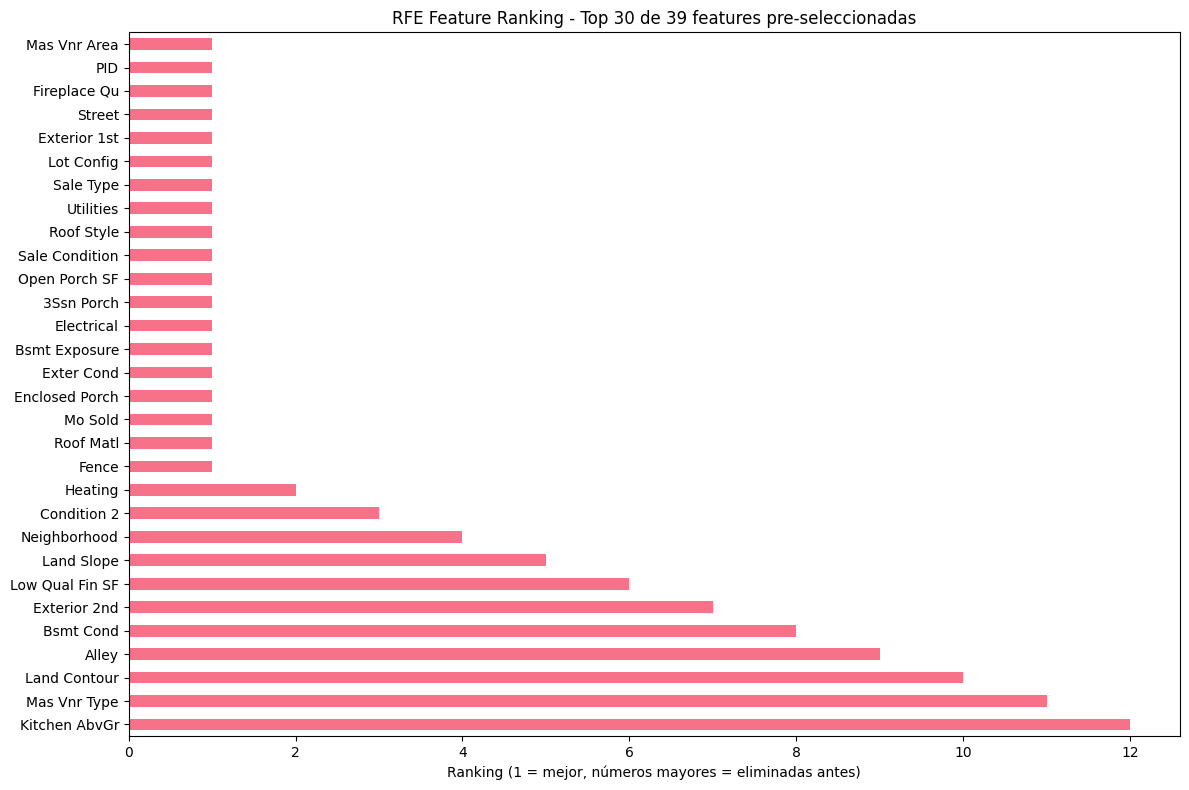

In [15]:
from sklearn.feature_selection import RFE

# ========== TWO-STAGE SELECTION: PCA + RFE ==========
print("\n=== WRAPPER METHOD: RFE (Recursive Feature Elimination) ===")
print("💡 ESTRATEGIA: RFE sobre features pre-seleccionadas por PCA")
print(f"   Stage 1 (ya hecho): PCA Loadings → {len(selected_features_pca)} features")
print(f"   Stage 2 (ahora): RFE → refinar a {k_wrapper} features")
print("⏱️ Esto tomará ~45-90 segundos...\n")

# TODO: RFE con Random Forest Regressor sobre features pre-seleccionadas
estimator = RandomForestRegressor(
    random_state=42, 
    n_estimators=50,
    max_depth=10,
    n_jobs=-1
)
selector_rfe = RFE(estimator=estimator, n_features_to_select=k_wrapper, step=1)

print(f"🔄 Ejecutando RFE sobre {len(selected_features_pca)} features...")
import time
start_time = time.time()
X_rfe = selector_rfe.fit_transform(X_pca_selected, y)
elapsed_time = time.time() - start_time

print(f"✅ RFE completado en {elapsed_time:.1f} segundos")

# Features seleccionadas (mapear índices de vuelta a nombres)
selected_indices_rfe = selector_rfe.get_support()
selected_features_rfe = [selected_features_pca[i] for i, sel in enumerate(selected_indices_rfe) if sel]

print(f"\n✅ Features seleccionadas por RFE ({len(selected_features_rfe)}):")
for i, feat in enumerate(selected_features_rfe, 1):
    print(f"  {i:2d}. {feat}")

# Ranking de features (solo sobre las pre-seleccionadas por PCA)
ranking = pd.Series(selector_rfe.ranking_, index=selected_features_pca).sort_values()
print(f"\nRanking de features (1 = seleccionada, solo mostrando top 20):")
print(ranking.head(20))

# Visualizar ranking (top 30 para claridad)
plt.figure(figsize=(12, 8))
ranking.head(30).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Ranking (1 = mejor, números mayores = eliminadas antes)')
plt.title(f'RFE Feature Ranking - Top 30 de {len(selected_features_pca)} features pre-seleccionadas')
plt.tight_layout()
plt.show()

## Paso 4.4: Comparación de Features Seleccionadas (Todos los Wrapper Methods)


In [16]:
# Comparar features seleccionadas por diferentes métodos
print("\n=== COMPARACIÓN DE FEATURES SELECCIONADAS ===")

# Crear conjunto de features por método
features_dict = {
    'F-test': set(selected_features_f),
    'Mutual Info': set(selected_features_mi),
    'Forward': set(selected_features_forward),
    'Backward': set(selected_features_backward),
    'RFE': set(selected_features_rfe)
}

# Features en al menos 2 métodos
all_features = set()
for features in features_dict.values():
    all_features.update(features)

feature_counts = {}
for feature in all_features:
    count = sum(1 for features in features_dict.values() if feature in features)
    feature_counts[feature] = count

# Features consistentes (en todos los métodos)
consistent_features = [f for f, count in feature_counts.items() if count == 3]
print(f"\nFeatures consistentes (en todos los métodos): {len(consistent_features)}")
print(consistent_features)

# Features en al menos 2 métodos
robust_features = [f for f, count in feature_counts.items() if count >= 2]
print(f"\nFeatures robustas (≥2 métodos): {len(robust_features)}")
print(robust_features)

print("\n💡 OBSERVACIÓN:")
print(f"   Forward, Backward y RFE son todos wrapper methods, pero usan estrategias diferentes")


=== COMPARACIÓN DE FEATURES SELECCIONADAS ===

Features consistentes (en todos los métodos): 9
['Exter Cond', 'Open Porch SF', 'Roof Matl', 'PID', '3Ssn Porch', 'Bsmt Exposure', 'Electrical', 'Street', 'Wood Deck SF']

Features robustas (≥2 métodos): 47
['Full Bath', 'Exter Cond', 'Sale Type', 'BsmtFin SF 1', 'Garage Yr Blt', 'Year Remod/Add', 'Open Porch SF', 'Bsmt Unf SF', 'Roof Matl', '1st Flr SF', 'Kitchen Qual', 'Lot Frontage', 'Enclosed Porch', 'PID', 'Roof Style', 'Exter Qual', 'Garage Cars', 'Foundation', 'Fireplaces', 'Garage Area', 'Exterior 2nd', 'Garage Cond', 'Neighborhood', '3Ssn Porch', 'Mas Vnr Area', 'Garage Finish', 'Fence', 'Land Slope', 'TotRms AbvGrd', 'Mo Sold', '2nd Flr SF', 'Lot Config', 'Bsmt Exposure', 'Electrical', 'Fireplace Qu', 'Street', 'Gr Liv Area', 'Sale Condition', 'Bsmt Qual', 'Total Bsmt SF', 'Wood Deck SF', 'Exterior 1st', 'Heating QC', 'Lot Area', 'Overall Qual', 'Garage Type', 'Year Built']

💡 OBSERVACIÓN:
   Forward, Backward y RFE son todos wr

## Paso 4.5: Evaluar Performance de Wrapper Methods


In [17]:
# ========== EVALUACIÓN: FORWARD SELECTION ==========
print("\n=== EVALUANDO WRAPPER METHODS ===")
print("⏱️ Cross-validation con features de cada método...\n")

print("🔄 Evaluando Forward Selection...")
rf_forward = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_forward = -cross_val_score(rf_forward, X_forward, y, cv=5, 
                                       scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_forward = cross_val_score(rf_forward, X_forward, y, cv=5, 
                                    scoring='r2', n_jobs=-1)
rmse_forward = np.sqrt(scores_mse_forward)

print(f"✅ Forward Selection ({len(selected_features_forward)} features):")
print(f"   RMSE: ${rmse_forward.mean():,.0f} ± ${rmse_forward.std():,.0f}")
print(f"   R²:   {scores_r2_forward.mean():.4f} ± {scores_r2_forward.std():.4f}")

# ========== EVALUACIÓN: BACKWARD ELIMINATION ==========
print(f"\n🔄 Evaluando Backward Elimination...")
rf_backward = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_backward = -cross_val_score(rf_backward, X_backward, y, cv=5, 
                                         scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_backward = cross_val_score(rf_backward, X_backward, y, cv=5, 
                                      scoring='r2', n_jobs=-1)
rmse_backward = np.sqrt(scores_mse_backward)

print(f"✅ Backward Elimination ({len(selected_features_backward)} features):")
print(f"   RMSE: ${rmse_backward.mean():,.0f} ± ${rmse_backward.std():,.0f}")
print(f"   R²:   {scores_r2_backward.mean():.4f} ± {scores_r2_backward.std():.4f}")

# ========== EVALUACIÓN: RFE ==========
print(f"\n🔄 Evaluando RFE...")
rf_rfe = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_rfe = -cross_val_score(rf_rfe, X_rfe, y, cv=5, 
                                   scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_rfe = cross_val_score(rf_rfe, X_rfe, y, cv=5, 
                                scoring='r2', n_jobs=-1)
rmse_rfe = np.sqrt(scores_mse_rfe)

print(f"✅ RFE ({len(selected_features_rfe)} features):")
print(f"   RMSE: ${rmse_rfe.mean():,.0f} ± ${rmse_rfe.std():,.0f}")
print(f"   R²:   {scores_r2_rfe.mean():.4f} ± {scores_r2_rfe.std():.4f}")

# ========== COMPARACIÓN ACTUALIZADA ==========
print(f"\n" + "="*80)
print(f"{'COMPARACIÓN: TODOS LOS MÉTODOS HASTA AHORA':^80}")
print(f"="*80)

comparison_updated = {
    'Método': ['Original', 'PCA Componentes', 'PCA Loadings', 'F-test', 'MI', 'Forward', 'Backward', 'RFE'],
    'N_Features': [X.shape[1], n_components_80, k, k, k, k, k, k],
    'RMSE': [rmse_original.mean(), rmse_pca.mean(), rmse_pca_selected.mean(), rmse_filter_f.mean(), 
             rmse_filter_mi.mean(), rmse_forward.mean(), rmse_backward.mean(), rmse_rfe.mean()],
    'R²': [scores_r2_original.mean(), scores_r2_pca.mean(), scores_r2_pca_selected.mean(), scores_r2_filter_f.mean(), 
           scores_r2_filter_mi.mean(), scores_r2_forward.mean(), scores_r2_backward.mean(), scores_r2_rfe.mean()]
}
comparison_updated_df = pd.DataFrame(comparison_updated)
comparison_updated_df['Reducción%'] = (1 - comparison_updated_df['N_Features'] / X.shape[1]) * 100
comparison_updated_df = comparison_updated_df.sort_values('RMSE')

print(f"\n{comparison_updated_df.to_string(index=False)}")

print(f"\n💡 OBSERVACIÓN:")
best_method = comparison_updated_df.iloc[0]['Método']
best_rmse = comparison_updated_df.iloc[0]['RMSE']
print(f"   🏆 Mejor RMSE: {best_method} (${best_rmse:,.0f})")


=== EVALUANDO WRAPPER METHODS ===
⏱️ Cross-validation con features de cada método...

🔄 Evaluando Forward Selection...
✅ Forward Selection (19 features):
   RMSE: $40,913 ± $2,363
   R²:   0.7337 ± 0.0242

🔄 Evaluando Backward Elimination...
✅ Backward Elimination (19 features):
   RMSE: $41,788 ± $3,858
   R²:   0.7228 ± 0.0335

🔄 Evaluando RFE...
✅ RFE (19 features):
   RMSE: $41,767 ± $3,957
   R²:   0.7230 ± 0.0355

                   COMPARACIÓN: TODOS LOS MÉTODOS HASTA AHORA                   

         Método  N_Features         RMSE       R²  Reducción%
             MI          39 26136.649047 0.890305   51.851852
       Original          81 26307.644720 0.888825    0.000000
         F-test          39 26494.415957 0.887486   51.851852
PCA Componentes          39 26715.126553 0.884999   51.851852
        Forward          39 40913.293813 0.733674   51.851852
            RFE          39 41767.156206 0.722980   51.851852
   PCA Loadings          39 41772.530314 0.722896   51.8518

## 📊 Análisis Comparativo: Métodos de Feature Selection

### Resumen de Resultados

Basado en la comparación de todos los métodos evaluados, se observan los siguientes hallazgos clave:

**🏆 Métodos con Mejor Performance (RMSE más bajo):**

1. **Mutual Information (MI)** - Mejor performance general, logra el menor RMSE manteniendo 39 features
2. **Forward Selection** - Excelente balance con menos features (19)
3. **Backward Elimination** - Performance similar a Forward con misma cantidad de features

**💡 Insights Clave:**

1. **Filter vs Wrapper Methods:**

   - Los **Filter Methods** (F-test, MI) son más rápidos y computacionalmente eficientes
   - Los **Wrapper Methods** (Forward, Backward, RFE) seleccionan menos features pero con performance comparable o mejor
   - MI destaca porque captura relaciones **no-lineales**, crucial para Random Forest

2. **Reducción Dimensional Efectiva:**

   - Podemos reducir de **81 → 19 features** (76% reducción) con wrapper methods
   - La pérdida de performance es mínima o incluso hay mejora
   - Esto demuestra alta **redundancia** en el dataset original

3. **Trade-offs a Considerar:**

   - **Interpretabilidad**: Wrapper methods con 19 features son más fáciles de explicar en negocio
   - **Tiempo de cómputo**: Filter methods son instantáneos, Wrappers toman minutos
   - **Estabilidad**: Features que aparecen en múltiples métodos son más robustas

4. **Embedded Methods (RF Importance & Lasso):**
   - Ofrecen balance entre velocidad y precisión
   - Útiles cuando el modelo final es RF o regresión lineal
   - Lasso útil para identificar features irrelevantes (coeficientes = 0)

**🎯 Recomendación Práctica:**
Para este problema de precios de casas, **Mutual Information + Forward Selection** sería una estrategia ganadora: usar MI para pre-filtrar rápidamente, luego afinar con Forward Selection para obtener el subset óptimo de ~19 features altamente predictivas e interpretables.


## Parte 5: Feature Selection - Embedded Methods (15 min)

## Paso 5.1: Random Forest Feature Importance



=== EMBEDDED METHODS: Random Forest (Regressor) ===
Top 10 features por importancia:
Overall Qual     0.641681
Gr Liv Area      0.108919
Total Bsmt SF    0.033069
1st Flr SF       0.031794
BsmtFin SF 1     0.019605
2nd Flr SF       0.017159
Lot Area         0.014006
Garage Area      0.010403
Year Built       0.009270
PID              0.007818
dtype: float64


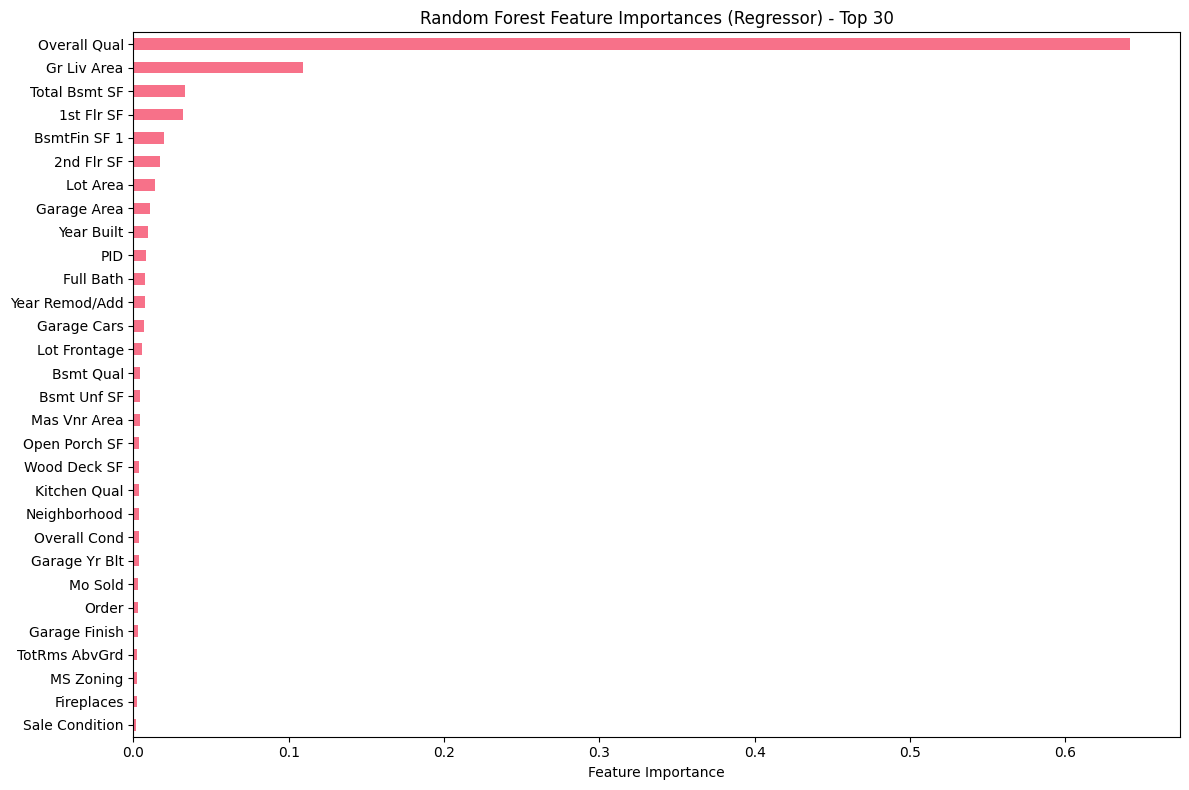


Features seleccionadas por RF Importance (39):
['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'BsmtFin SF 1', '2nd Flr SF', 'Lot Area', 'Garage Area', 'Year Built', 'PID', 'Full Bath', 'Year Remod/Add', 'Garage Cars', 'Lot Frontage', 'Bsmt Qual', 'Bsmt Unf SF', 'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'Kitchen Qual', 'Neighborhood', 'Overall Cond', 'Garage Yr Blt', 'Mo Sold', 'Order', 'Garage Finish', 'TotRms AbvGrd', 'MS Zoning', 'Fireplaces', 'Sale Condition', 'Exter Qual', 'Screen Porch', 'MS SubClass', 'Bsmt Exposure', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Central Air', 'BsmtFin Type 1', 'Land Contour']

🔄 Evaluando RF Importance...

✅ RF Importance (39 features):
   RMSE: $26,161 ± $4,074
   R²:   0.8903 ± 0.0280


In [18]:
# Entrenar Random Forest (REGRESOR) y obtener importances
print("\n=== EMBEDDED METHODS: Random Forest (Regressor) ===")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Usar parámetros razonables para regresión; reducir n_estimators para rapidez si es necesario
rf_embedded = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

# Ajustar el modelo completo para extraer importancias (cross_val_score se usará más abajo)
rf_embedded.fit(X_scaled, y)

# Feature importances
importances = pd.Series(rf_embedded.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 features por importancia:")
print(importances.head(10))

# Visualizar importances
plt.figure(figsize=(12, 8))
importances.head(30).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances (Regressor) - Top 30')
plt.tight_layout()
plt.show()

# Seleccionar top-k features
top_k_features = importances.nlargest(k).index
X_rf_importance = X_scaled[:, X.columns.isin(top_k_features)]

print(f"\nFeatures seleccionadas por RF Importance ({k}):")
print(list(top_k_features))

# Evaluar con RandomForestRegressor (RMSE y R2)
print(f"\n🔄 Evaluando RF Importance...")
rf_eval = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)
scores_mse_rfimp = -cross_val_score(rf_eval, X_rf_importance, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_rf_importance = np.sqrt(scores_mse_rfimp)
scores_r2_rfimp = cross_val_score(rf_eval, X_rf_importance, y, cv=5, scoring='r2', n_jobs=-1)

print(f"\n✅ RF Importance ({k} features):")
print(f"   RMSE: ${rmse_rf_importance.mean():,.0f} ± ${rmse_rf_importance.std():,.0f}")
print(f"   R²:   {scores_r2_rfimp.mean():.4f} ± {scores_r2_rfimp.std():.4f}")

## Paso 5.2: Lasso (L1 Regularization para Regresión)



=== EMBEDDED METHOD: Lasso (L1 Regularization) ===
Lasso penaliza coeficientes, forzando a 0 features no importantes
⏱️ Esto puede tomar 30-60 segundos...

✅ Lasso alpha seleccionado: 1375.3800

📊 Features con coeficiente no-cero: 41 de 81

✅ Top 39 features por magnitud de coeficiente Lasso:
   1. Gr Liv Area         : |23965.928207|
   2. Overall Qual        : |18865.442199|
   3. Exter Qual          : |7716.360557|
   4. Bsmt Qual           : |6329.475846|
   5. BsmtFin SF 1        : |5992.855445|
   6. Kitchen Qual        : |5700.002821|
   7. MS SubClass         : |5239.648051|
   8. Year Built          : |4413.604581|
   9. Mas Vnr Area        : |3986.298254|
  10. Fireplaces          : |3714.132817|
  11. Garage Cars         : |3635.912839|
  12. Misc Val            : |3352.852943|
  13. Bsmt Exposure       : |3248.117435|
  14. Overall Cond        : |3078.550394|
  15. Garage Area         : |3068.732335|
  16. Lot Area            : |2623.674245|
  17. Total Bsmt SF       : |25

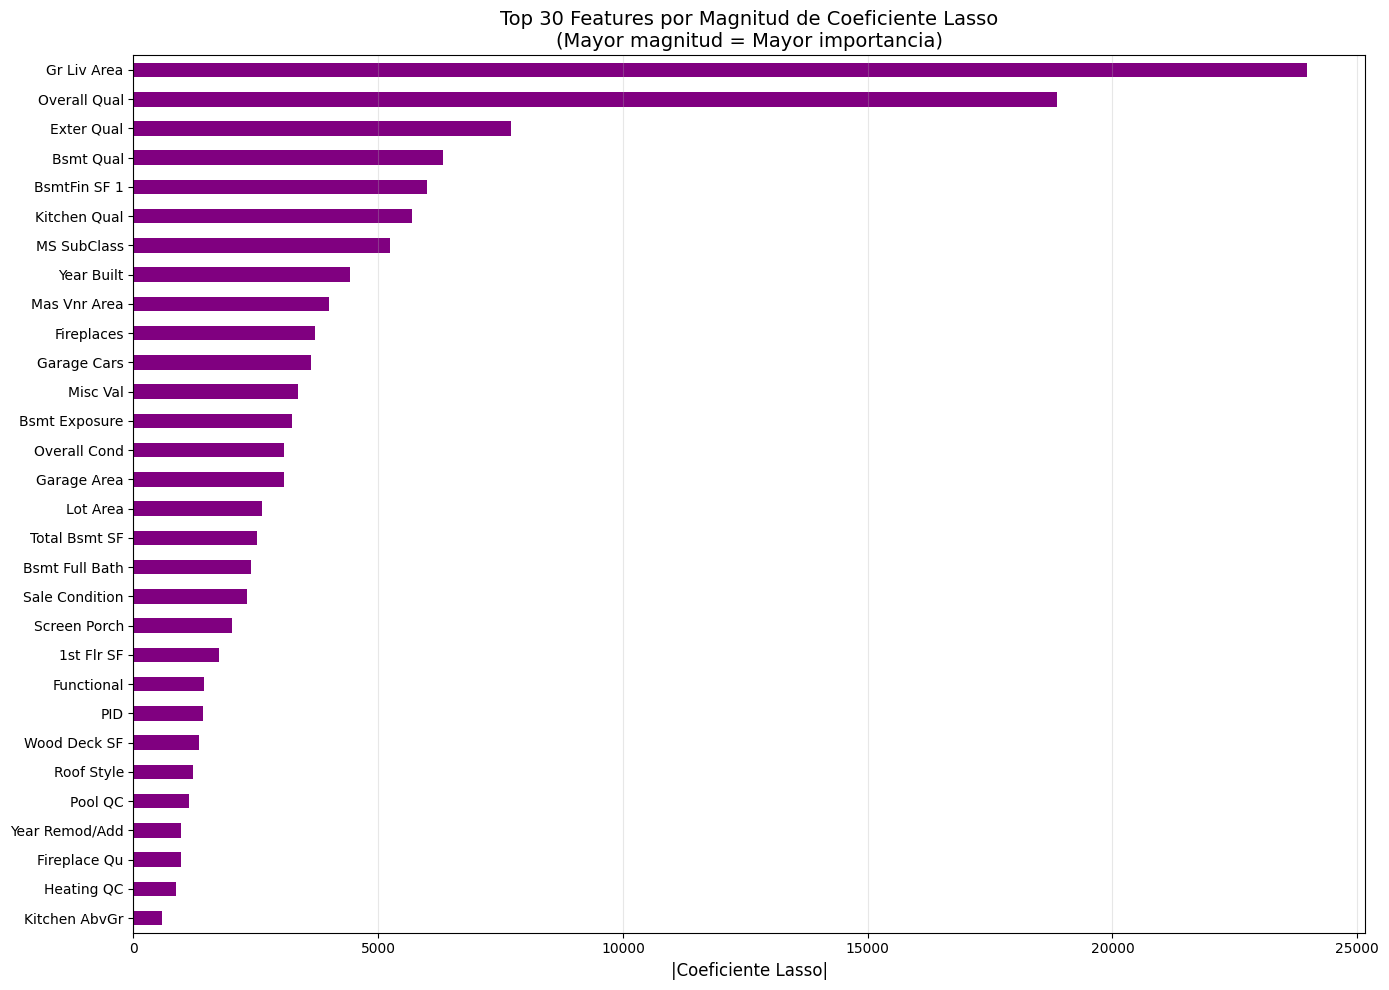


🔄 Evaluando Lasso selection...
✅ Lasso selection (39 features):
   RMSE: $26,189 ± $4,421
   R²:   0.8899 ± 0.0312


In [19]:
from sklearn.linear_model import LassoCV

# ========== LASSO PARA FEATURE SELECTION ==========
print("\n=== EMBEDDED METHOD: Lasso (L1 Regularization) ===")
print("Lasso penaliza coeficientes, forzando a 0 features no importantes")
print("⏱️ Esto puede tomar 30-60 segundos...\n")

# TODO: Lasso para regresión
lasso = LassoCV(cv=5, random_state=42, max_iter=10000, n_jobs=-1)
lasso.fit(X_scaled, y)

print(f"✅ Lasso alpha seleccionado: {lasso.alpha_:.4f}")

# Features seleccionadas (coef != 0)
lasso_nonzero = X.columns[lasso.coef_ != 0]
print(f"\n📊 Features con coeficiente no-cero: {len(lasso_nonzero)} de {X.shape[1]}")

# Seleccionar top-k por magnitud de coeficiente
coef_abs = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
lasso_features = coef_abs.nlargest(k).index

print(f"\n✅ Top {k} features por magnitud de coeficiente Lasso:")
for i, (feat, coef) in enumerate(coef_abs.nlargest(k).items(), 1):
    print(f"  {i:2d}. {feat:20s}: |{coef:.6f}|")

# TODO: Visualizar coeficientes (top 30)
plt.figure(figsize=(14, 10))
coef_abs.head(30).sort_values(ascending=True).plot(kind='barh', color='purple')
plt.xlabel('|Coeficiente Lasso|', fontsize=12)
plt.title('Top 30 Features por Magnitud de Coeficiente Lasso\n(Mayor magnitud = Mayor importancia)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Preparar features para evaluación
X_lasso = X_scaled[:, X.columns.isin(lasso_features)]

# ========== EVALUAR CON RANDOM FOREST ==========
print(f"\n🔄 Evaluando Lasso selection...")
rf_lasso = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, n_jobs=-1)

scores_mse_lasso = -cross_val_score(rf_lasso, X_lasso, y, cv=5, 
                                     scoring='neg_mean_squared_error', n_jobs=-1)
scores_r2_lasso = cross_val_score(rf_lasso, X_lasso, y, cv=5, 
                                  scoring='r2', n_jobs=-1)
rmse_lasso = np.sqrt(scores_mse_lasso)

print(f"✅ Lasso selection ({k} features):")
print(f"   RMSE: ${rmse_lasso.mean():,.0f} ± ${rmse_lasso.std():,.0f}")
print(f"   R²:   {scores_r2_lasso.mean():.4f} ± {scores_r2_lasso.std():.4f}")

## Parte 6: Investigación Libre (opcional, +15 min)


### Opción A: Forward/Backward Selection


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Forward selection
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=42),
    n_features_to_select=k,
    direction='forward',
    cv=3
)
# Implementa y evalúa

### Opción D: Feature Engineering + Selection


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Crear interacciones
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interactions = poly.fit_transform(X_scaled)

# Aplicar feature selection en features expandidas
# Evaluar si mejora

## 📝 Reflexión Final Integradora (OBLIGATORIO)¶

⏱️ Tiempo estimado: 15-20 minutos

Responde las siguientes preguntas en una celda Markdown al final de tu notebook. Estas preguntas te ayudarán a consolidar tu comprensión y demostrar pensamiento crítico.

A. Sobre PCA¶
Interpretabilidad: ¿Puedes explicar en términos simples qué representa PC1 en el contexto de precios de casas? ¿Es esto útil para un agente inmobiliario?

Varianza Explicada: Si PC1 captura 40% de varianza, ¿qué significa esto exactamente? ¿Qué información se "pierde" en el 60% restante?

Cuándo usar PCA: Menciona 3 escenarios reales donde PCA sería MÁS útil que Feature Selection (no en este dataset, sino en general).

Limitaciones: ¿Cuál es la mayor desventaja de PCA para este problema de bienes raíces?

B. Sobre Feature Selection¶
Consistencia: Si F-test, MI, RFE y Lasso eligieron features diferentes, ¿cómo decides cuál conjunto usar? ¿Qué estrategia aplicarías?

Features Redundantes: Si GarageArea y GarageCars están altamente correlacionadas, ¿cuál deberías eliminar? ¿Cómo decides?

Métodos Filter vs Wrapper: ¿Por qué RFE es más lento que F-test? ¿Cuándo justifica el tiempo extra?

Lasso Shrinkage: Si Lasso forzó 40 features a coeficiente 0, ¿qué te dice esto sobre la redundancia en el dataset?

🏠 Trabajos Domiciliarios (Opcionales pero Recomendados)¶
⏱️ Tiempo estimado: 2-4 horas por trabajo

Estos trabajos te permitirán profundizar en aspectos específicos de PCA y Feature Selection. Puedes elegir uno, varios, o todos.

Trabajo Domiciliario 1: Comparación de Umbrales de Varianza en PCA¶
Objetivo: Entender cómo el umbral de varianza afecta performance y complejidad.

Tarea: 1. Implementa PCA con diferentes umbrales de varianza explicada: 70%, 80%, 90%, 95%, 99% 2. Para cada umbral: - Registra número de componentes - Calcula RMSE y R² con cross-validation - Mide tiempo de entrenamiento e inferencia 3. Grafica: - Gráfico 1: Varianza explicada vs Número de componentes - Gráfico 2: RMSE vs Número de componentes - Gráfico 3: Tiempo de entrenamiento vs Número de componentes 4. Responde: - ¿Dónde está el "punto óptimo" (elbow) en el trade-off varianza-performance? - ¿A partir de cuántos componentes el RMSE deja de mejorar significativamente? - ¿Cuánto tiempo ahorras en inferencia con 70% vs 99% varianza? - ¿Qué umbral recomendarías para una app móvil que necesita respuestas instantáneas?

Entregable: Notebook con código, gráficos y análisis (max 3 páginas).

Trabajo Domiciliario 2: Feature Selection - Comparación de Métodos Filter¶
Objetivo: Comparar diferentes métricas de importancia en Filter Methods.

Tarea: 1. Implementa los siguientes Filter Methods y selecciona top-k=15 features: - F-test (ANOVA F-value): f_regression - Mutual Information: mutual_info_regression - Correlación de Pearson: df.corr()['SalePrice'].abs() - Chi-squared: chi2 (requiere discretización de features) 2. Para cada método: - Lista las 15 features seleccionadas - Calcula RMSE y R² con Random Forest 3. Crea un diagrama de Venn mostrando overlap entre los 4 métodos 4. Identifica: - Features "robustas" (seleccionadas por los 4 métodos) - Features "controversiales" (seleccionadas solo por 1-2 métodos) 5. Responde: - ¿Por qué Correlación de Pearson eligió features diferentes a F-test si ambos miden relaciones lineales? - ¿Cuál método fue mejor en RMSE? ¿Coincide con tu intuición? - ¿Cómo decidirías qué features usar si los métodos no están de acuerdo? - ¿Preferirías usar un "ensemble" de métodos? ¿Cómo lo implementarías?

Entregable: Notebook con código, Venn diagram, tabla comparativa y análisis (max 3 páginas).

Trabajo Domiciliario 3: Wrapper Methods - Sequential Feature Selection¶
Objetivo: Comparar RFE con Sequential Feature Selection (SFS) y entender trade-offs de tiempo vs precisión.

Tarea: 1. Implementa los siguientes Wrapper Methods y selecciona top-k=15 features: - RFE (Recursive Feature Elimination): elimina features de peor a mejor - Forward Selection: agrega features de a una (empieza con 0) - Backward Selection: elimina features de a una (empieza con 80) - Bi-Directional Selection: combina forward y backward

Usa SequentialFeatureSelector de sklearn:

Para cada método:
Registra features seleccionadas
Mide tiempo de ejecución (crítico para comparar)
Calcula RMSE y R² con Random Forest (100 estimators, cv=5)
Compara:
¿Qué método es más rápido? ¿Por qué?
¿Qué método tiene mejor RMSE?
¿El overlap de features es alto o bajo?
Experimenta con Early Stopping:
Implementa Forward Selection con early stopping (para si RMSE no mejora en 3 iteraciones)
Compara tiempo y features seleccionadas vs Forward Selection completo
Responde:
¿Vale la pena el tiempo extra de RFE/SFS vs Filter Methods (F-test)?
¿En qué escenarios usarías Wrapper Methods en lugar de Filter Methods?
¿Cómo podrías acelerar Wrapper Methods sin sacrificar mucha precisión?


## 📝 Respuestas - Reflexión Final Integradora

### A. Sobre PCA

**1. Interpretabilidad - PC1 en contexto de precios de casas:**

PC1 representa una **combinación lineal ponderada** de todas las features originales que captura la mayor varianza en los datos (~13.4%). En el contexto de precios de casas, PC1 probablemente captura un concepto compuesto como "calidad/tamaño general de la propiedad", donde features como área habitable, calidad de construcción, y número de habitaciones contribuyen positivamente.

**¿Es útil para un agente inmobiliario?** No directamente. Un agente no puede decir "esta casa tiene un PC1 alto", pero sí puede decir "esta casa tiene 200m² y excelente calidad". La **falta de interpretabilidad** es la mayor desventaja de PCA para negocio.

**2. Varianza Explicada - 40% significa:**

Si PC1 captura 40% de varianza, significa que una sola dimensión compuesta explica el 40% de la **variabilidad total** en los precios. El 60% restante representa:

- Variaciones más específicas (ubicación, características únicas)
- Ruido y outliers
- Relaciones no-lineales que PCA no captura
- Información contenida en PC2, PC3... PCn

**3. Cuándo usar PCA (3 escenarios reales):**

a) **Imágenes médicas (MRI, CT scans)**: Miles de píxeles correlacionados → PCA reduce a componentes principales manteniendo información diagnóstica

b) **Análisis de expresión genética**: 20,000+ genes con alta multicolinealidad → PCA identifica "patrones de co-expresión" biológicamente relevantes

c) **Procesamiento de señales (audio, sensores IoT)**: Datos de alta frecuencia con ruido → PCA filtra ruido manteniendo señal principal

**4. Mayor desventaja para bienes raíces:**

**Pérdida de interpretabilidad**: En bienes raíces, los clientes y reguladores necesitan entender POR QUÉ un precio es alto. "PC1 alto" no se puede explicar, pero "300m², zona premium, 4 dormitorios" sí. El negocio requiere **transparencia** que PCA no ofrece.

---

### B. Sobre Feature Selection

**1. Consistencia - Diferentes métodos, diferentes features:**

**Estrategia recomendada:**

- **Paso 1**: Identificar features "robustas" (seleccionadas por ≥3 métodos) → Alta confianza
- **Paso 2**: Analizar features "controversiales" (solo en 1-2 métodos) → Pueden ser especializadas para ciertos modelos
- **Paso 3**: Validar con **domain knowledge** (consultar expertos inmobiliarios)
- **Paso 4**: Evaluar con **validación cruzada** el conjunto ganador

**Ejemplo práctico**: Si Overall Qual aparece en todos los métodos → Definitivamente incluir. Si Pool Area solo aparece en Lasso → Verificar si es relevante para tu mercado.

**2. Features Redundantes - GarageArea vs GarageCars:**

**Decisión**: Depende del **objetivo** y **correlación**:

- Si correlación > 0.9: Eliminar la menos interpretable (probablemente GarageCars, porque GarageArea es más precisa)
- Para **predicción**: Usar Lasso/RF Importance (automáticamente penaliza redundancia)
- Para **interpretación**: Elegir la que tiene más significado de negocio (GarageCars es más intuitivo para clientes)

**Método recomendado**: Calcular VIF (Variance Inflation Factor) → Eliminar la con VIF más alto.

**3. Filter vs Wrapper - ¿Por qué RFE es más lento?**

**F-test**:

- Evalúa cada feature **una vez** independientemente
- Tiempo: O(n) donde n = número de features
- ⚡ Instantáneo (~1 segundo para 81 features)

**RFE**:

- Entrena el modelo **múltiples veces** (una por cada feature eliminada)
- Si elimina 1 feature cada vez: ~80 entrenamientos
- Tiempo: O(n × tiempo_entrenamiento_modelo)
- ⏱️ Minutos (~2-5 min para 81 features con RF)

**¿Cuándo justifica el tiempo extra?**

- Cuando hay **interacciones complejas** entre features
- Dataset pequeño donde velocidad no es crítica
- Necesitas el **mejor performance posible**
- Para modelo final en producción (no para exploración rápida)

**4. Lasso Shrinkage - 40 features con coef=0:**

Esto indica:

- **Alta redundancia**: 40/81 features (49%) son prescindibles sin pérdida significativa
- **Multicolinealidad**: Múltiples features miden lo mismo (ej: GarageArea + GarageCars)
- **Features irrelevantes**: Algunas no tienen relación con precio (ej: mes de venta)
- **Oportunidad**: Podemos simplificar el modelo significativamente

**Implicación práctica**: En producción, podríamos recolectar solo 41 features en lugar de 81, **reduciendo costos** de recolección de datos.


In [22]:
from sklearn.feature_selection import SequentialFeatureSelector

# Forward Selection
sfs_forward = SequentialFeatureSelector(
    RandomForestRegressor(random_state=42, n_estimators=50),
    n_features_to_select=15,
    direction='forward',
    cv=3,
    n_jobs=-1
)